In [220]:
# 9,CongestionWindow
# 17,SmoothedRTT
# 20,RetransmissionTimeout
# 21,SocketSendBufferSize
# 22,SocketSendBufferBytes
# 23,SocketReceiveBufferSize
# 24,SocketReceiveBufferBytes
# 25,UnacknowledgedBytes

# # With ECN and no ECN

In [221]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import matplotlib.pyplot as plt
# from gym import wrappers
# from gym import spaces
import math
import random
import re
import os
import sys
import seaborn as sns

# import gym
# import tensorflow as tf
# from tensorflow.keras import layers
# col = ['Direction', 'Hash', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
#        'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']
col = ['Direction', 'Time', 'LocalIP', 'LocalPort', 'ForeignIP', 'ForeignPort', 'SlowStartThreshold', 'CongestionWindow', 'BandwidthControlledWindow', 'SendingWindow', 'ReceiveWindow', 'SendingWindowScalingFactor', 'ReceiveWindowScalingFactor', 'TCPFiniteStateMachine',
       'MaximumSegmentSize', 'SmoothedRTT', 'SACKEnabled', 'TCPFlags', 'RetransmissionTimeout', 'SocketSendBufferSize', 'SocketSendBufferBytes', 'SocketReceiveBufferSize', 'SocketReceiveBufferBytes', 'UnacknowledgedBytes', 'ReassemblyQueue', 'Flowid', 'Flowtype']


In [222]:
col = [
    "Direction",
    "Time",
    "LocalIP",
    "LocalPort",
    'ForeignIP',
    'ForeignPort',
    'SlowStartThreshold',
    'CongestionWindow',
    "t_flags2 State",
    "Current Sending Window (bytes)",
    "Current Receive Window (bytes)",
    "Sending Window Scaling Factor",
    "Receiving Window Scaling Factor",
    "TCPFiniteStateMachine",
    "MaximumSegmentSize",
    "Current Smoothed RTT Estimate (microseconds)",
    "SACK Enabled Indicator",
    "TCP Flags State",
    "Retransmission Timeout (microseconds)",
    "Socket Send Buffer Size (bytes)",
    "Socket Send Buffer Usage (bytes)",
    "Socket Receive Buffer Size (bytes)",
    "Socket Receive Buffer Usage (bytes)",
    "Unacknowledged Bytes In-flight",
    "Segments in Reassembly Queue",
    "Flow ID",
    "Flow Type"
]


In [223]:
col = [
    "Direction",
    "Time",
    "LocalIP",
    "LocalPort",
    'ForeignIP',
    'ForeignPort',
    'SlowStartThreshold',
    'CongestionWindow',
    "t_flags2 State",
    "Current Sending Window (bytes)",
    "Current Receive Window (bytes)",
    "Sending Window Scaling Factor",
    "Receiving Window Scaling Factor",
    "TCPFiniteStateMachine",
    "MaximumSegmentSize",
    "SmoothedRTT",
    "SACK Enabled Indicator",
    "TCP Flags State",
    "Retransmission Timeout (microseconds)",
    "Socket Send Buffer Size (bytes)",
    "Socket Send Buffer Usage (bytes)",
    "Socket Receive Buffer Size (bytes)",
    "Socket Receive Buffer Usage (bytes)",
    "Unacknowledged Bytes In-flight",
    "Segments in Reassembly Queue",
    "Flow ID",
    "Flow Type"
]


In [224]:
len(col)

27

In [225]:
col[15]

'SmoothedRTT'

In [226]:
import re

def contains_1_or_2(input_string):
    if '2' in input_string:
        return 2
    elif '1' in input_string:
        return 1
    else:
        return 0

# Example usage:
test_string = "abc123xyz"
result = contains_1_or_2(test_string)
print("Result:", result)


Result: 2


In [227]:
# plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100, 'font.size':16})

In [228]:
def functionfilenameandpath(path='./', extension='.log'):
    filepaths = []
    filenames = []

    for root, _, files_list in os.walk(path):
        for file_name in files_list:
            if file_name.endswith(extension):
                file_name_path = os.path.join(root, file_name)
                filenames.append(file_name)
                filepaths.append(file_name_path)

    return filenames, filepaths

In [229]:
folderpath="./client1_data"
filenames,filepaths=functionfilenameandpath(folderpath,'.log')

filepaths.sort()
filenames.sort()
print(filenames)

['fq_codel_10Mbps_20ms_ecn_cubic_src1.siftr.log', 'fq_codel_1Mbps_20ms_ecn_cubic_src1.siftr.log', 'fq_pie_10Mbps_20ms_ecn_cubic_src1.siftr.log', 'fq_pie_1Mbps_20ms_ecn_cubic_src1.siftr.log', 'l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log', 'l4s_1Mbps_20ms_ecn_cubic_src1.siftr.log']


In [230]:
# for index in range(len(filenames)):
#     print("..................>>>>>>>>>>>>>>>>>")
#     print(filenames[index])
#     print(contains_1_or_2(filenames[index]))
#     print("..................>>>>>>>>>>>>>>>>>")

In [231]:
def remove_outliers_iqr(df, column_name):
    """
    Remove outliers from a specified column in a DataFrame using the IQR method.
    
    Parameters:
    df (pd.DataFrame): The DataFrame.
    column_name (str): The name of the column from which to remove outliers.
    
    Returns:
    pd.DataFrame: The DataFrame with outliers removed.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

fq_codel_10Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/fq_codel_10Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


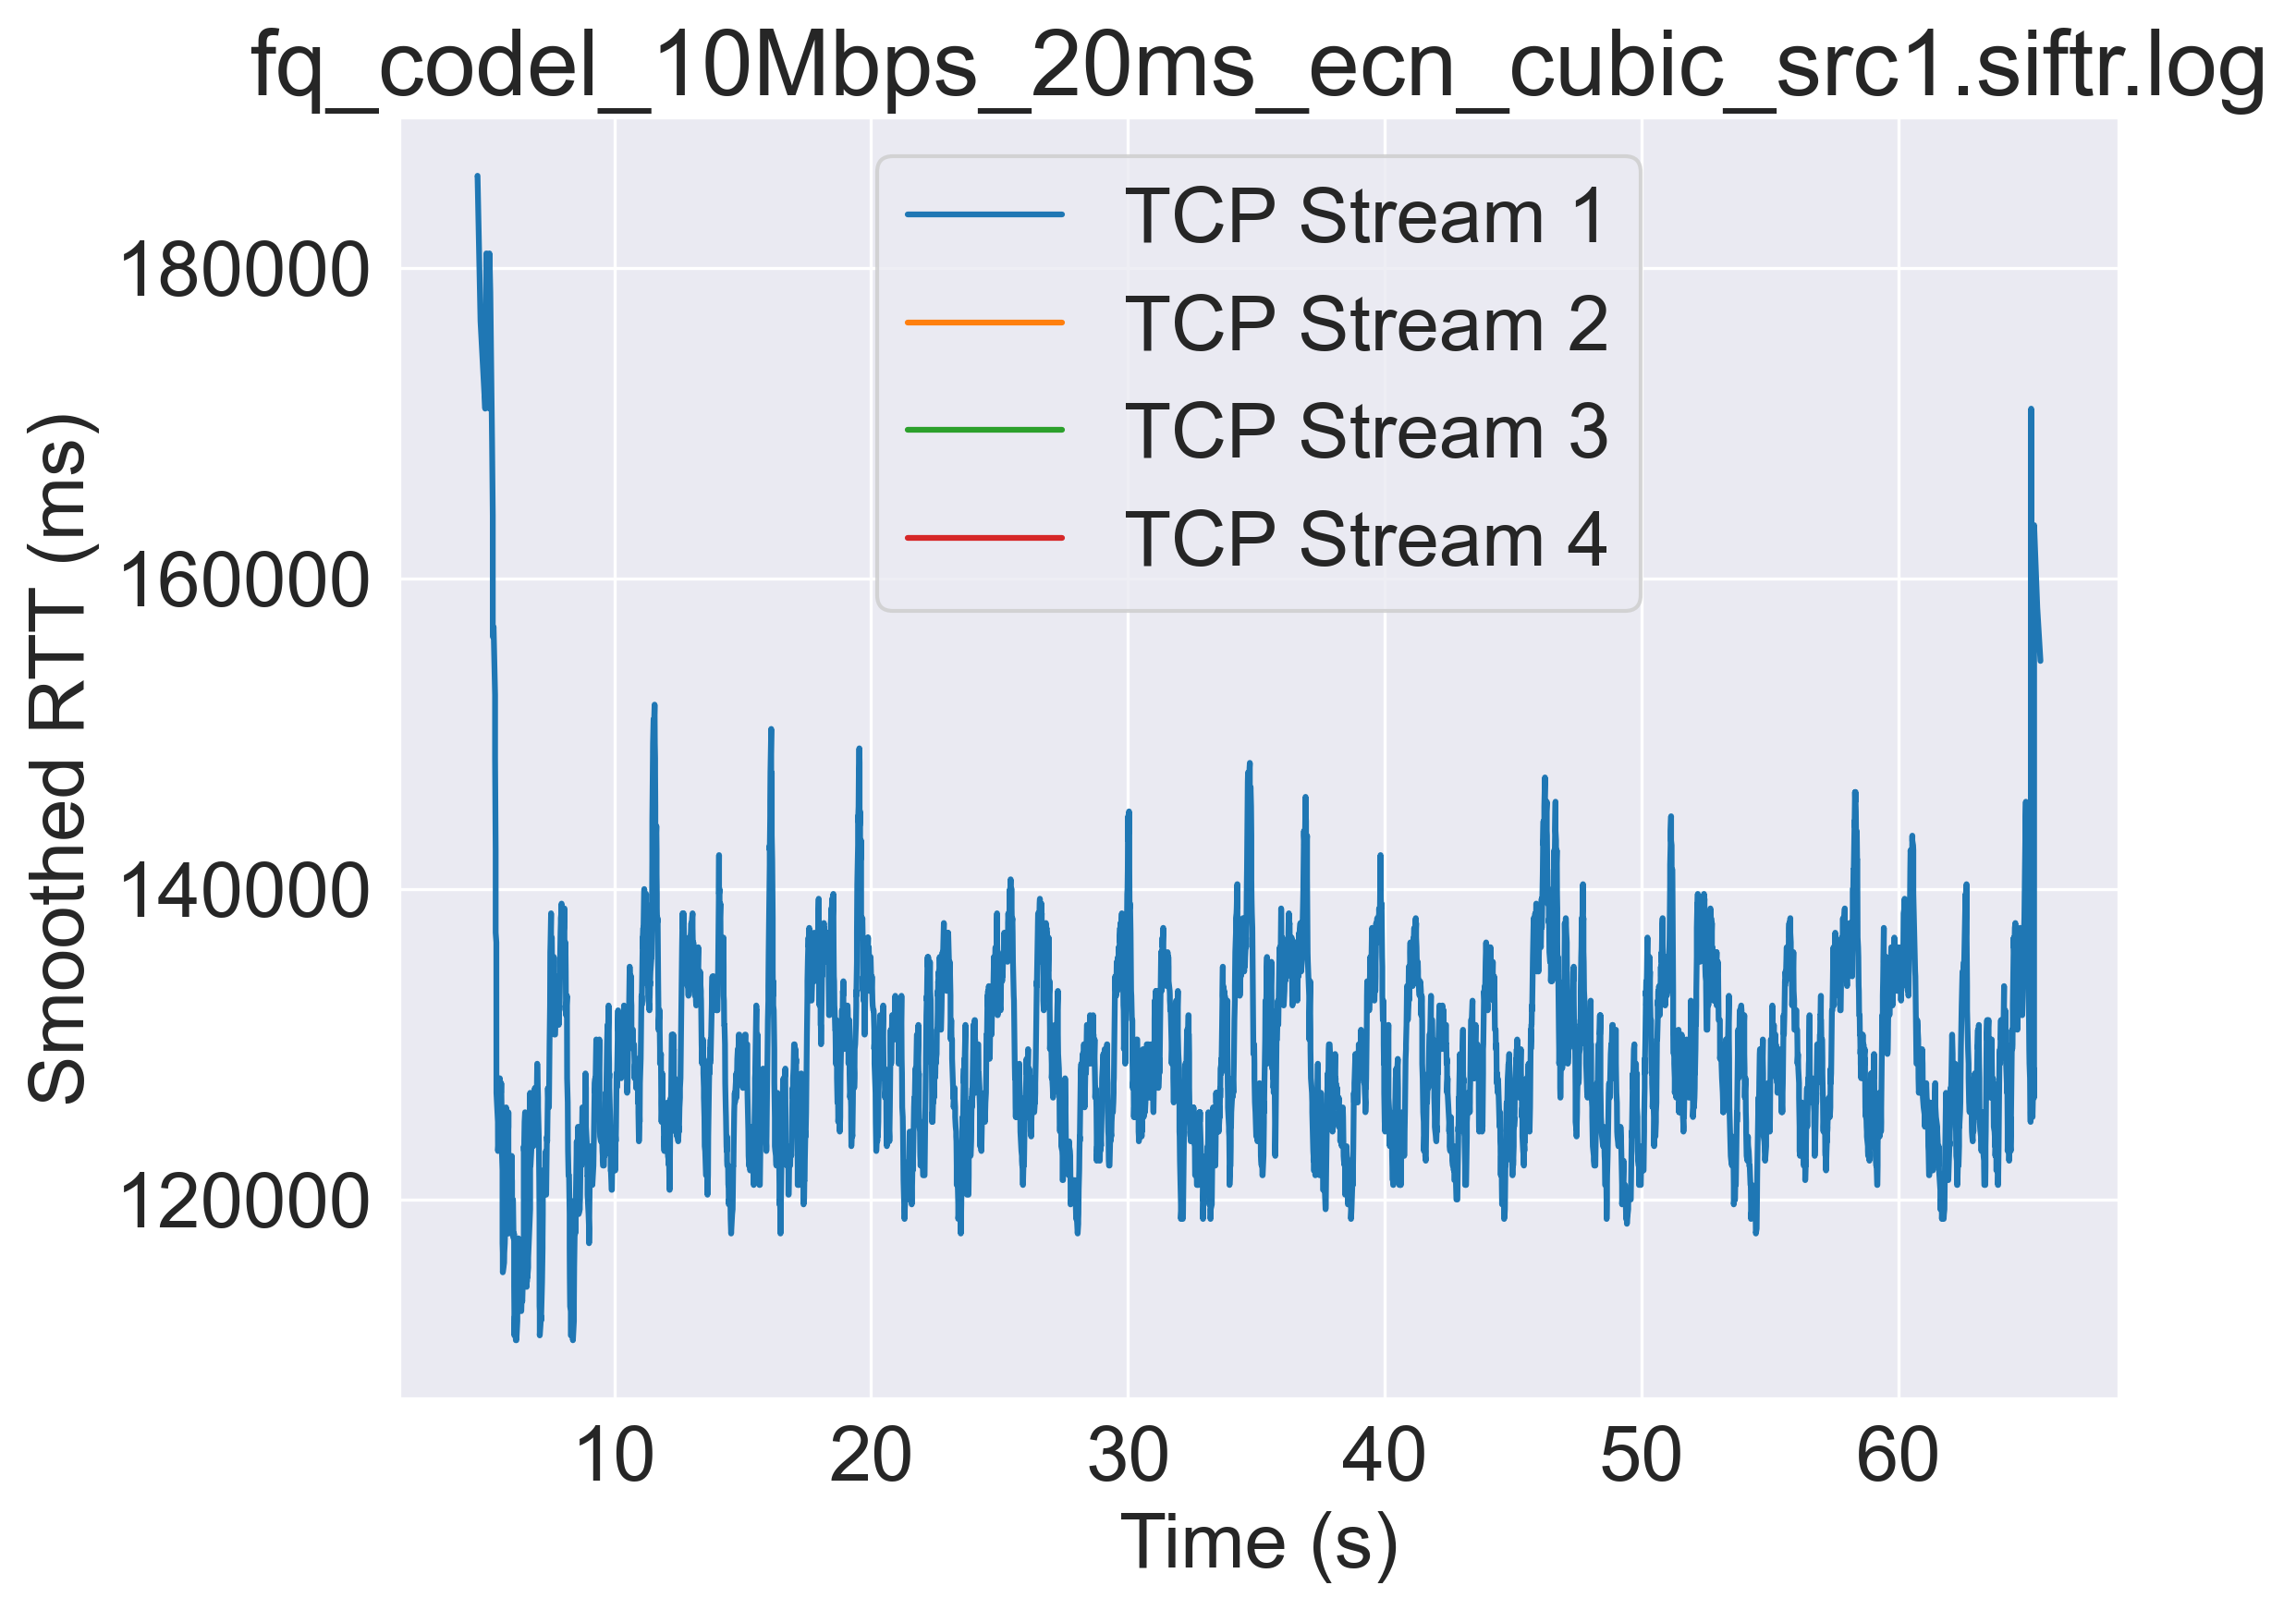

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


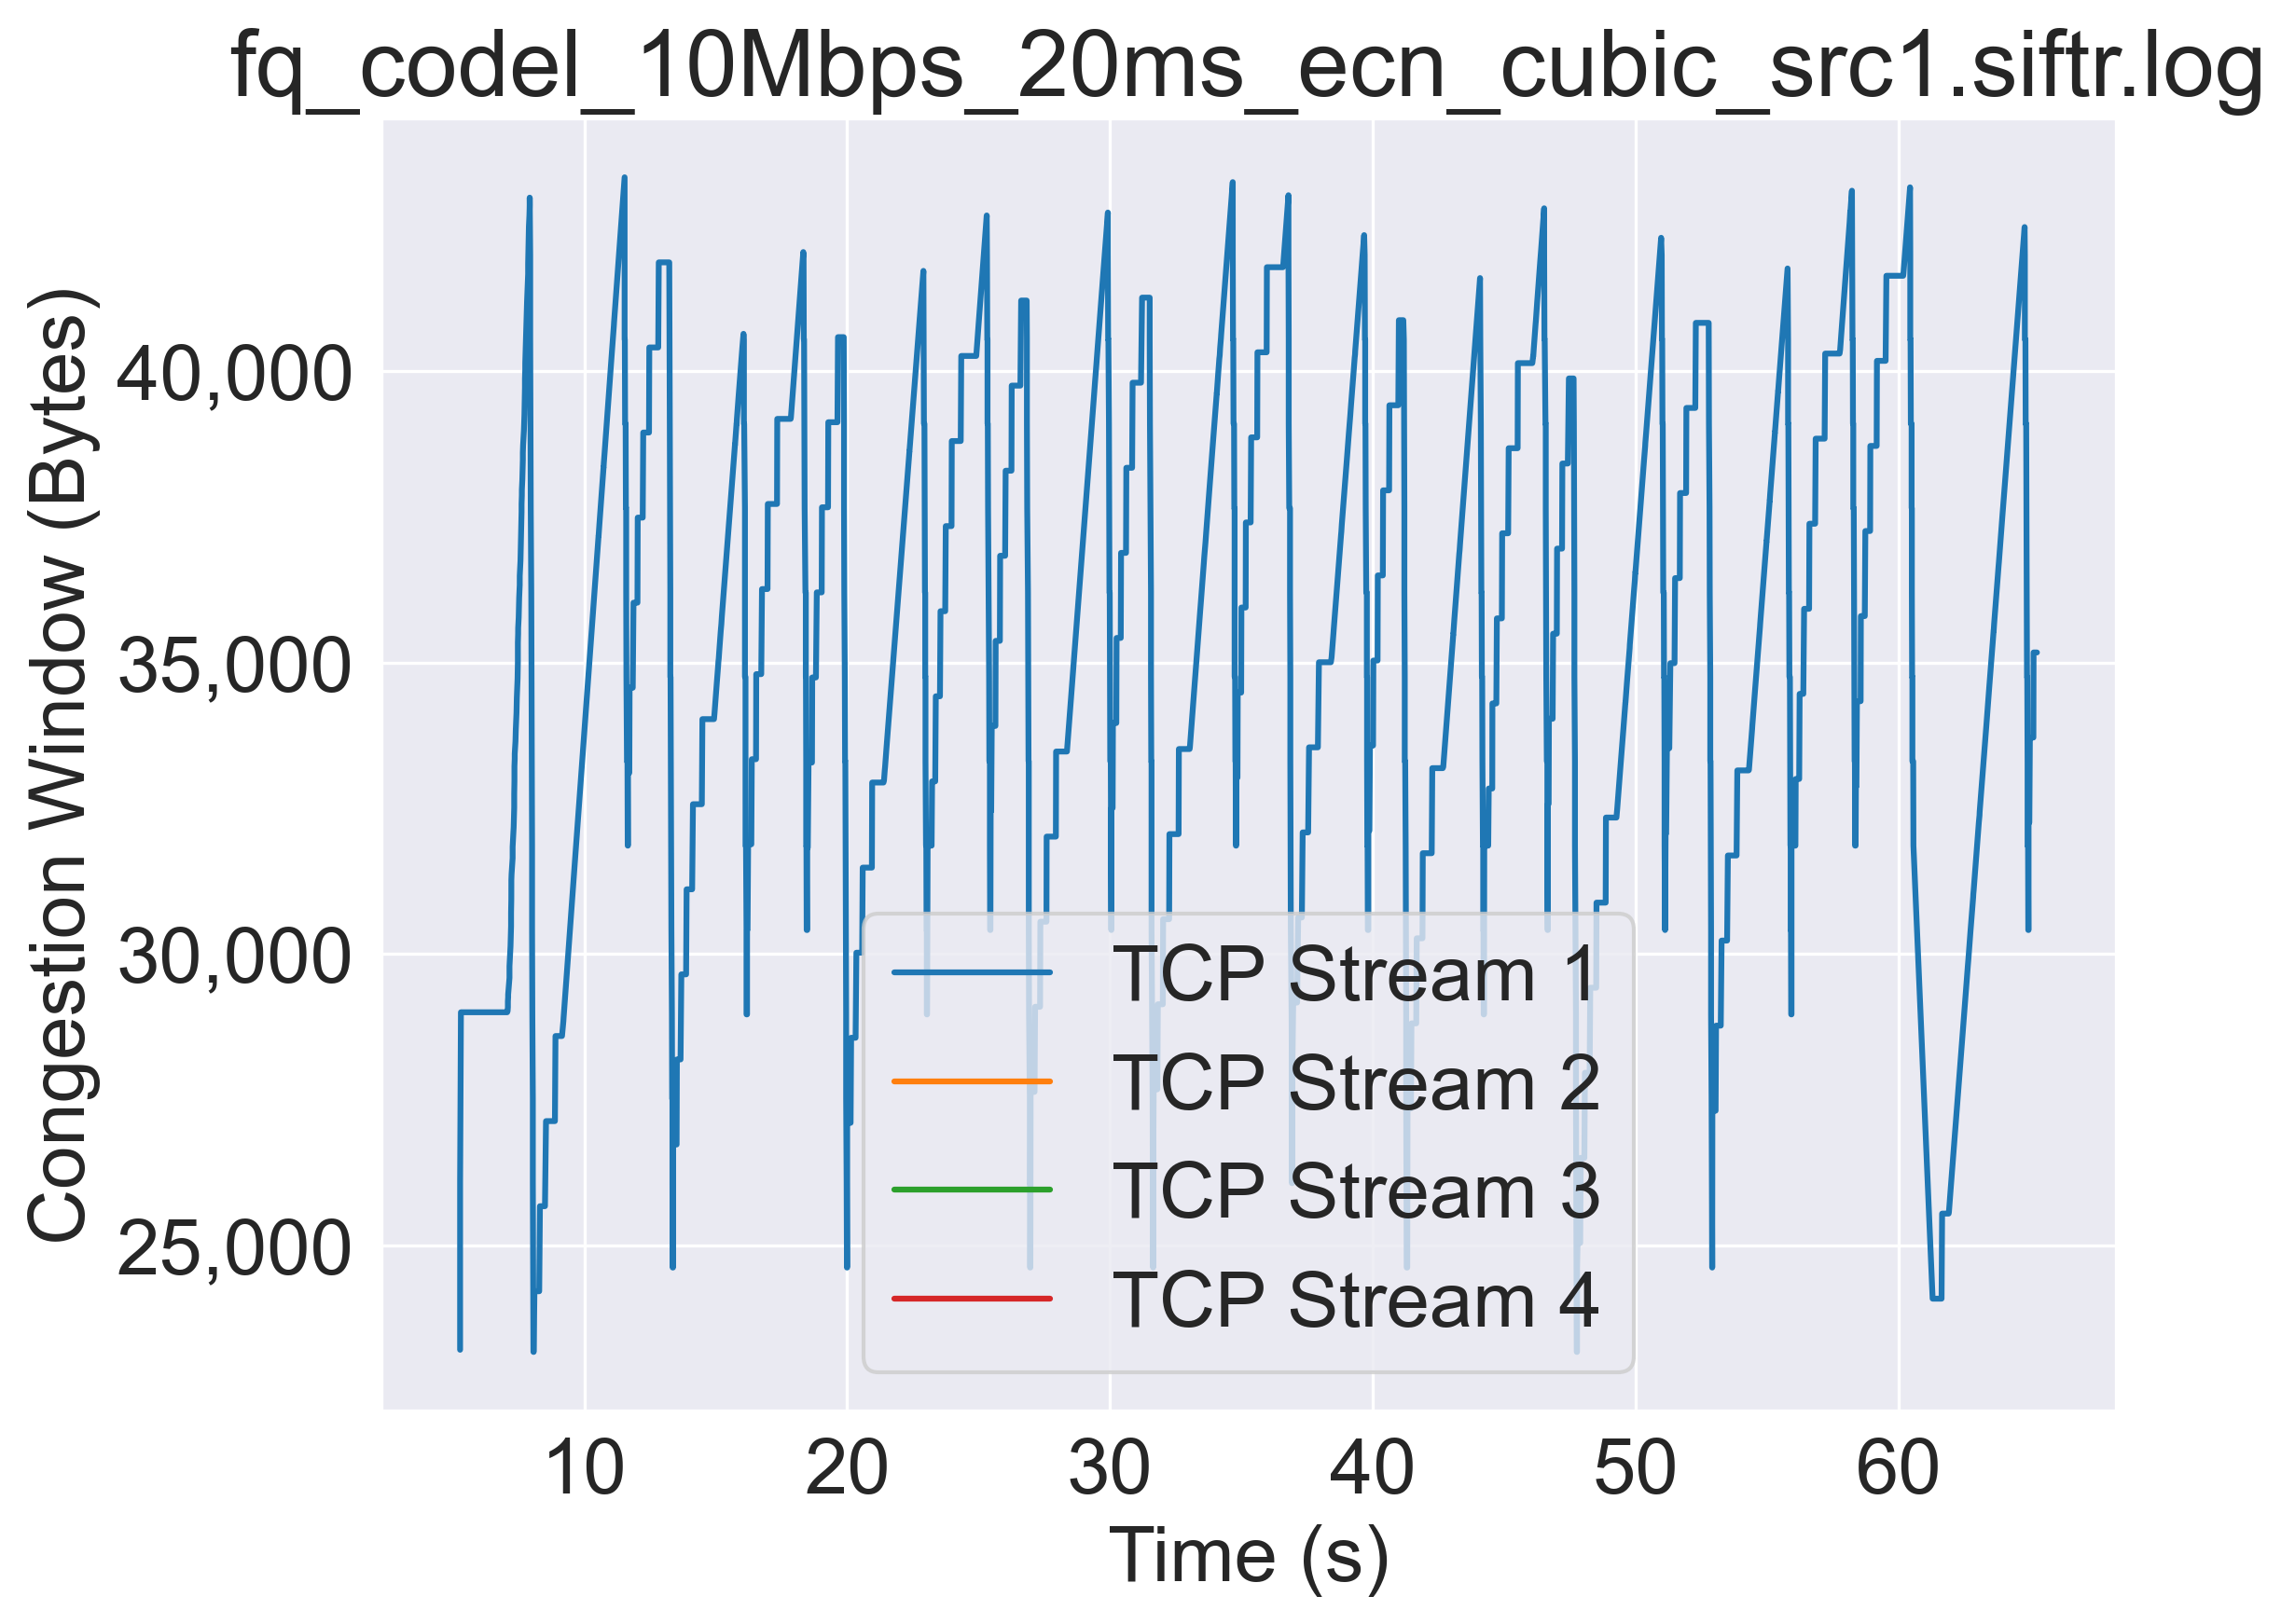

fq_codel_1Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/fq_codel_1Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


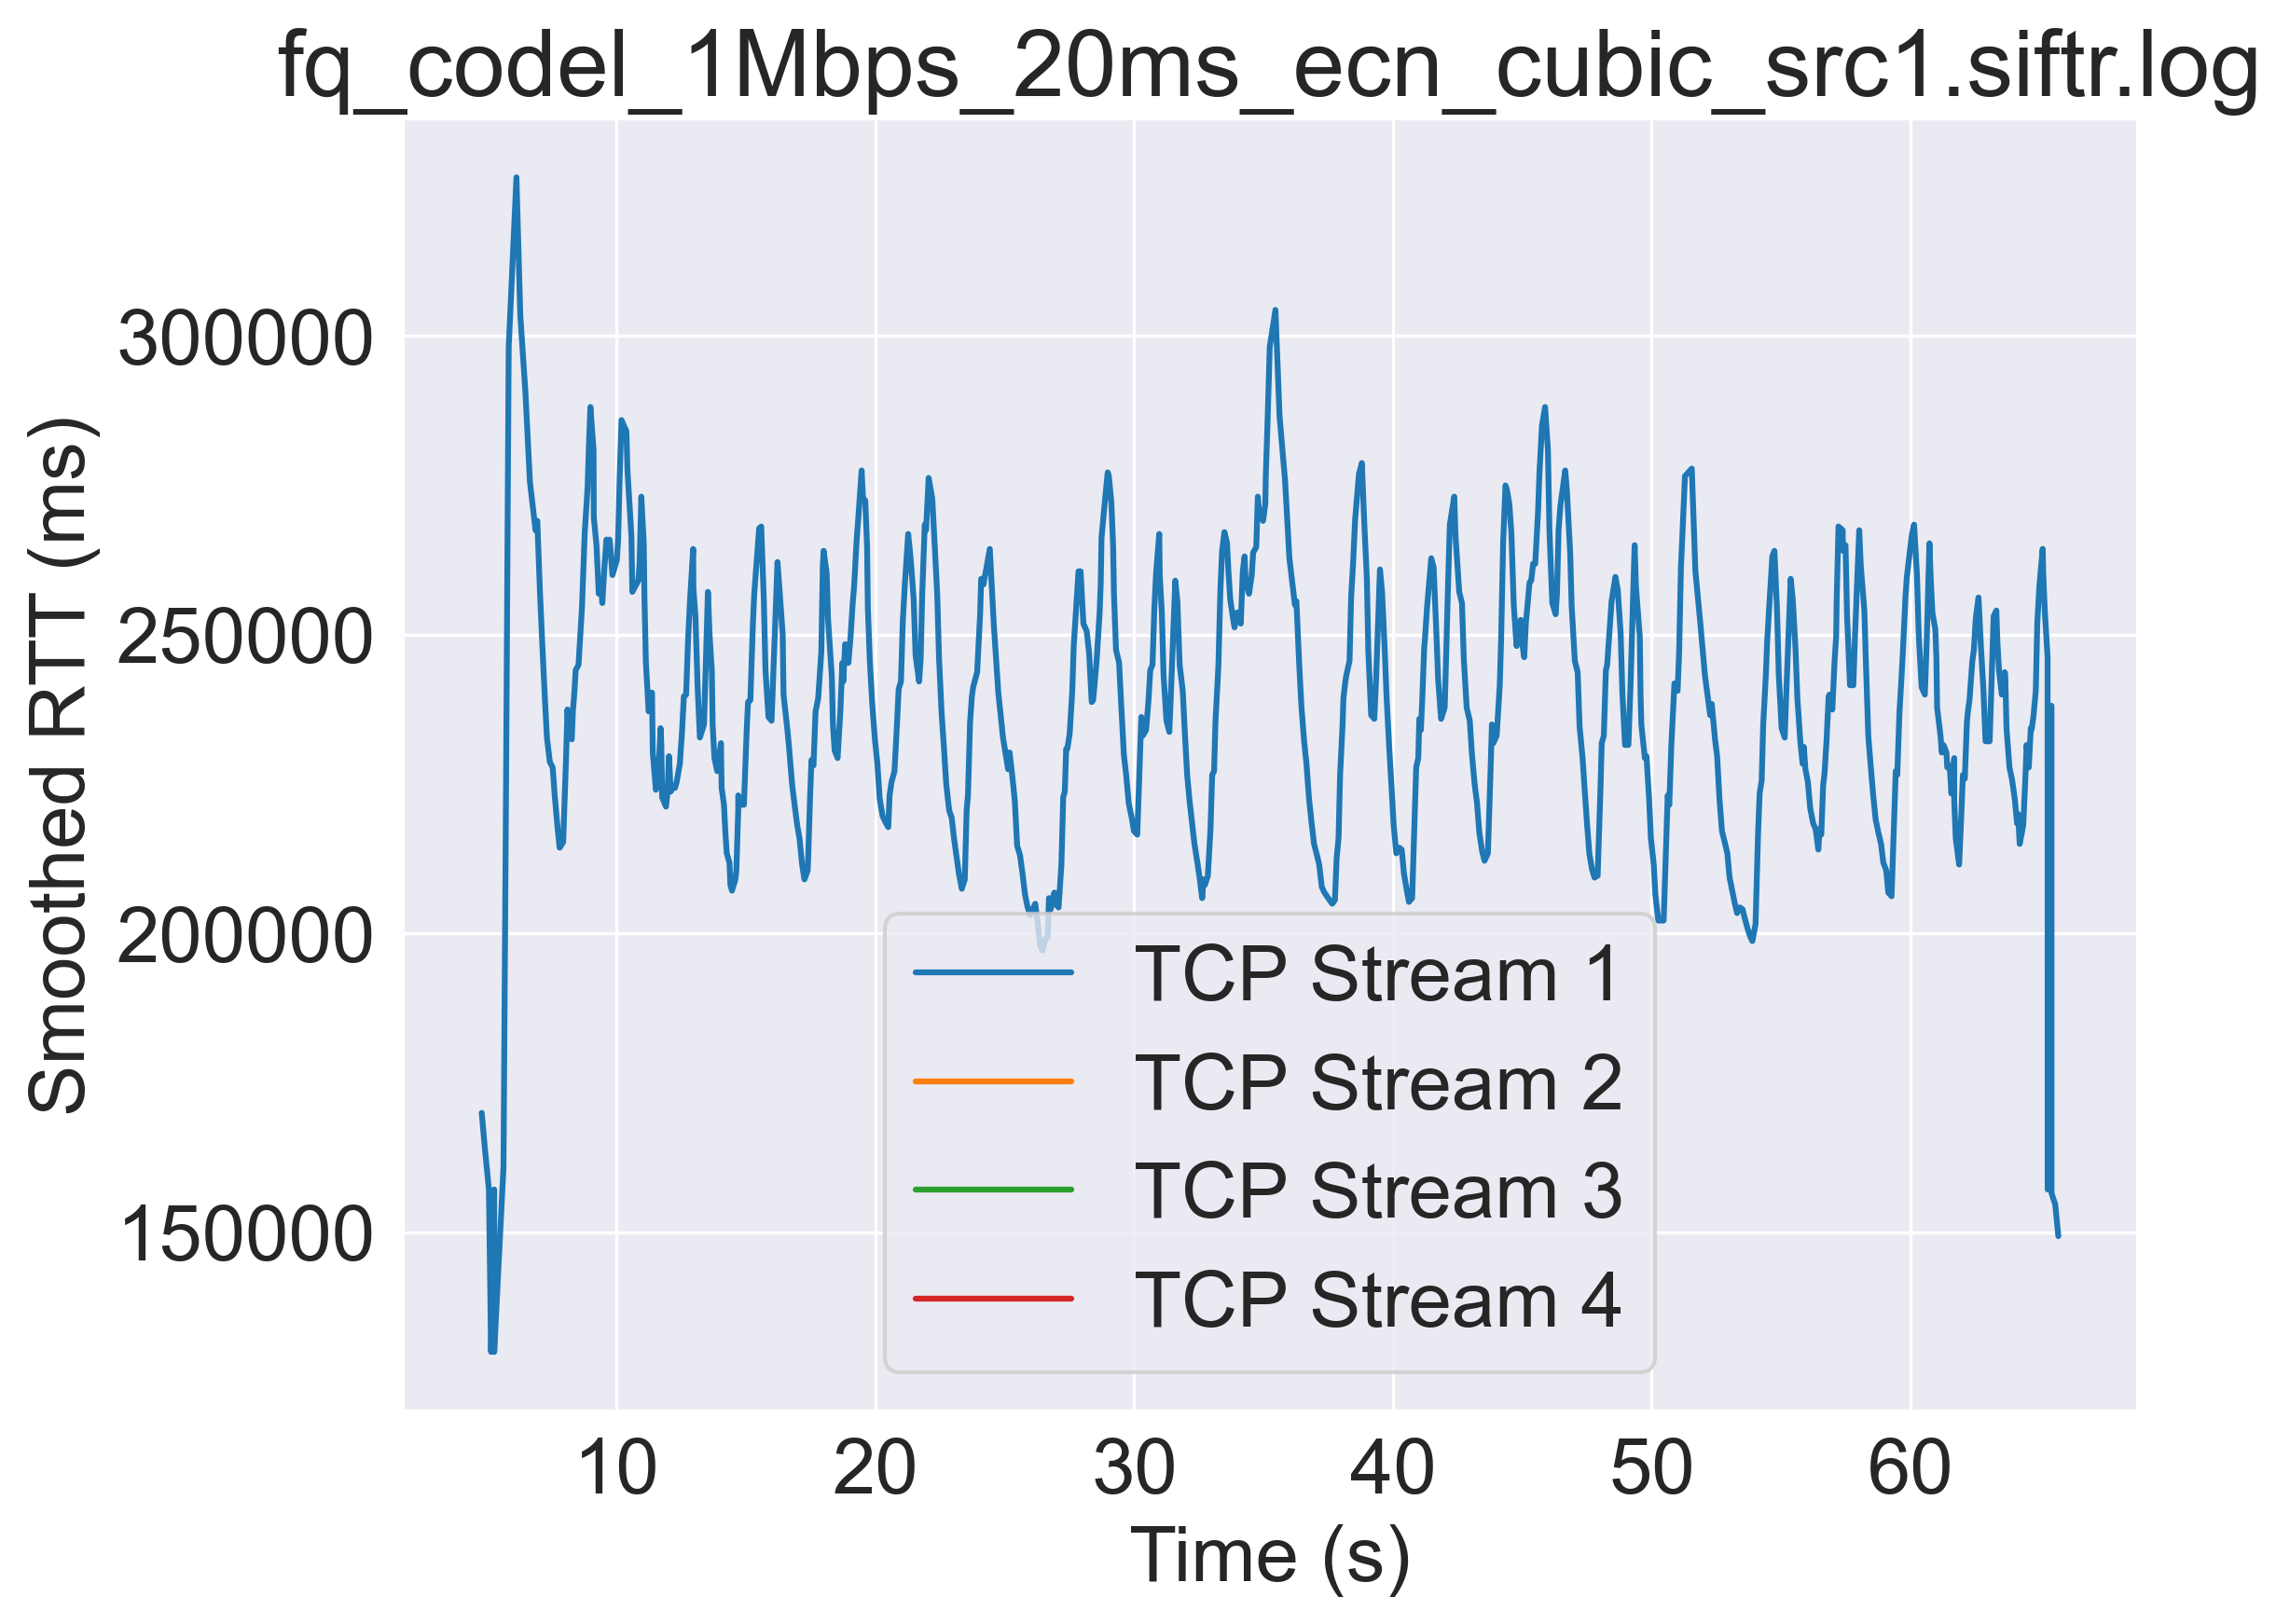

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


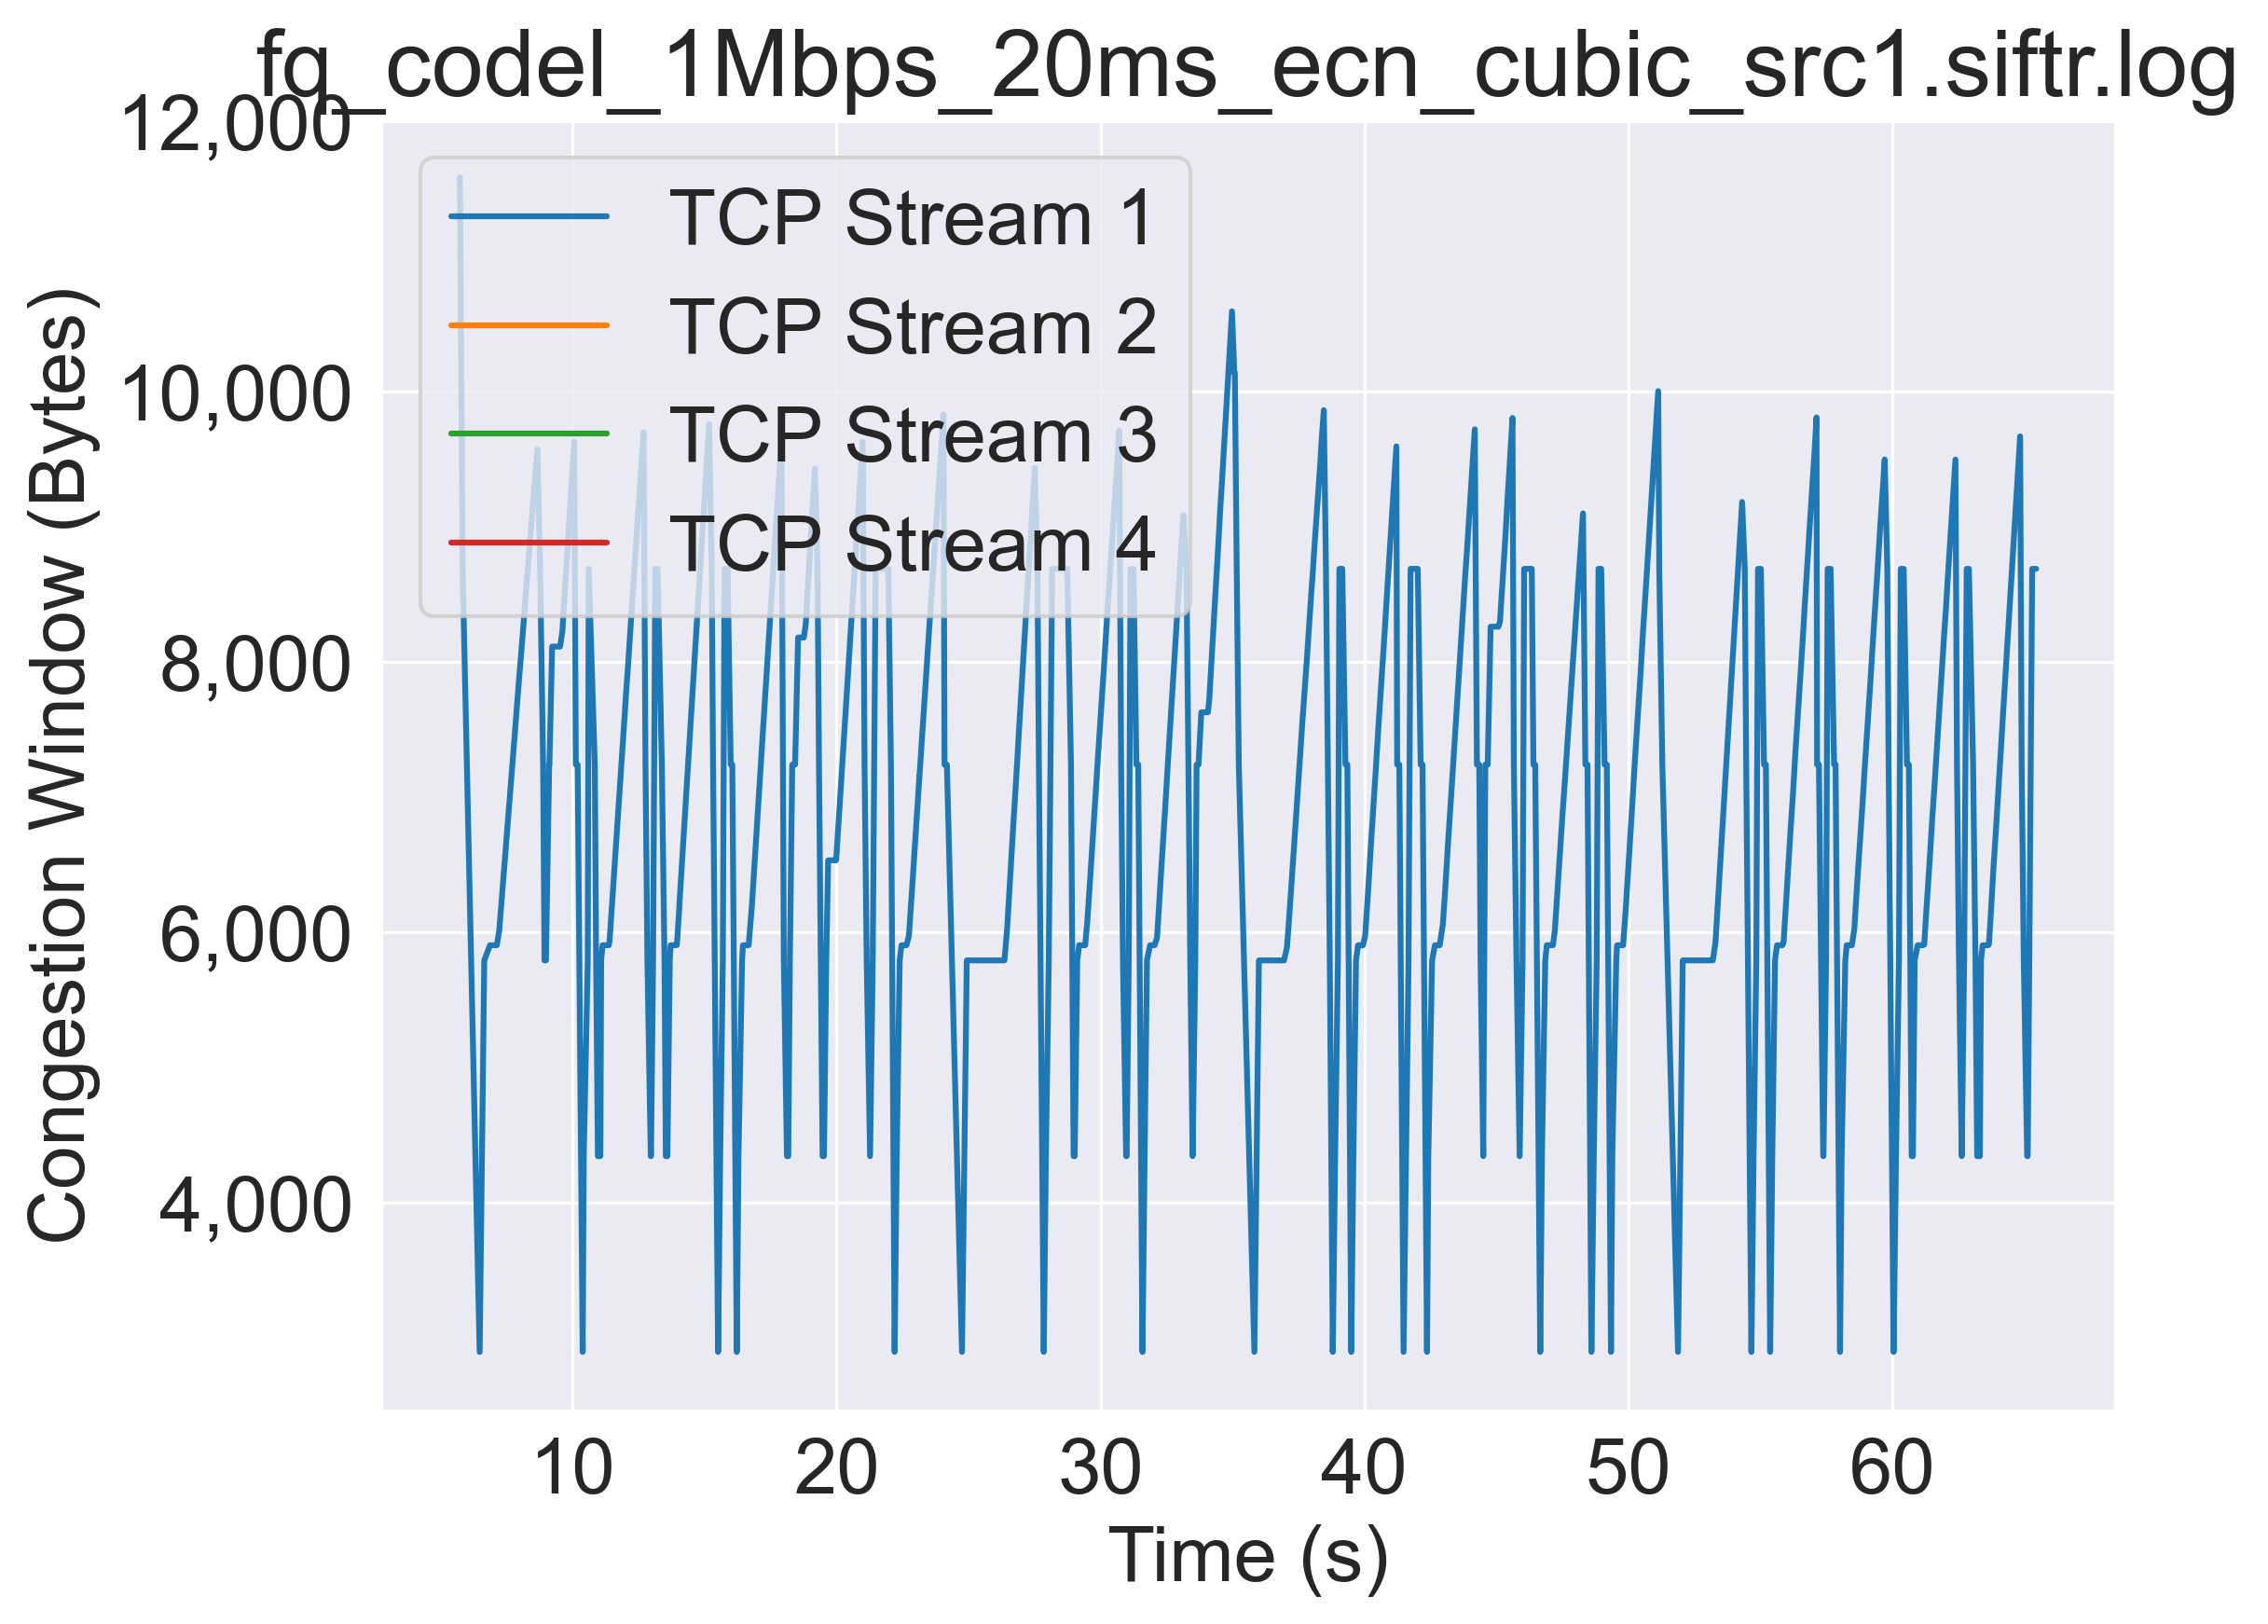

fq_pie_10Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/fq_pie_10Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


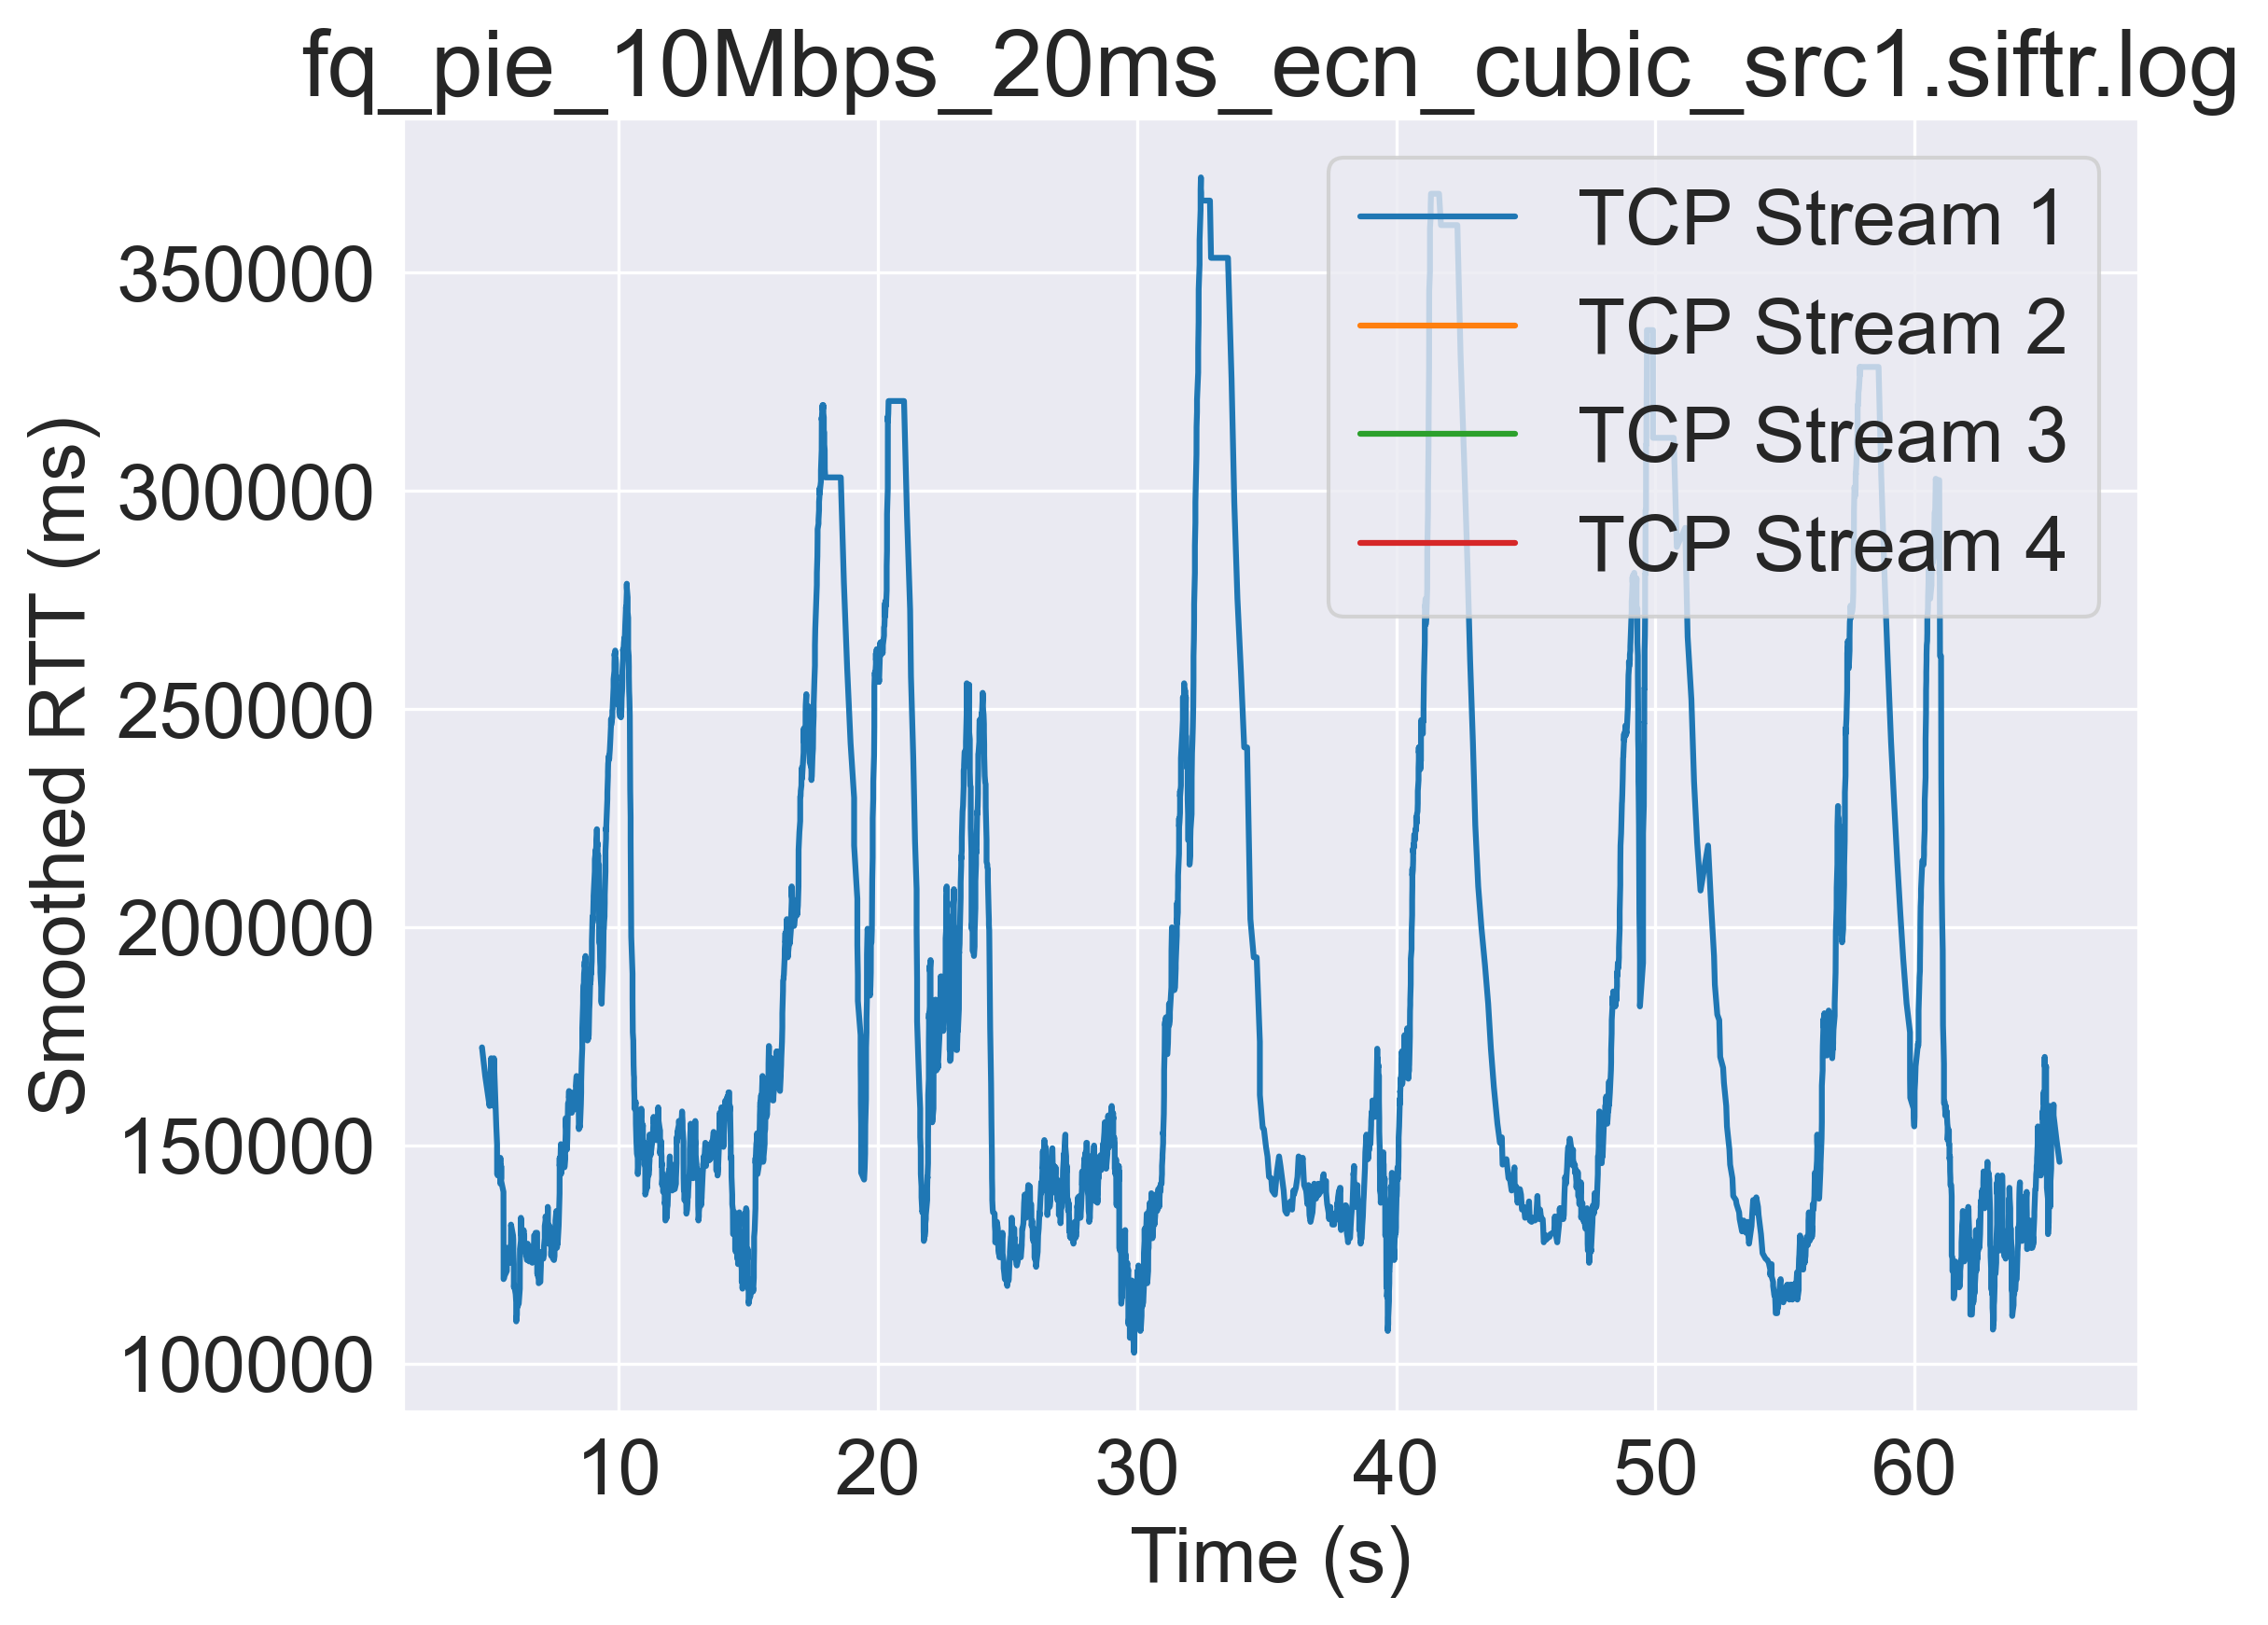

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


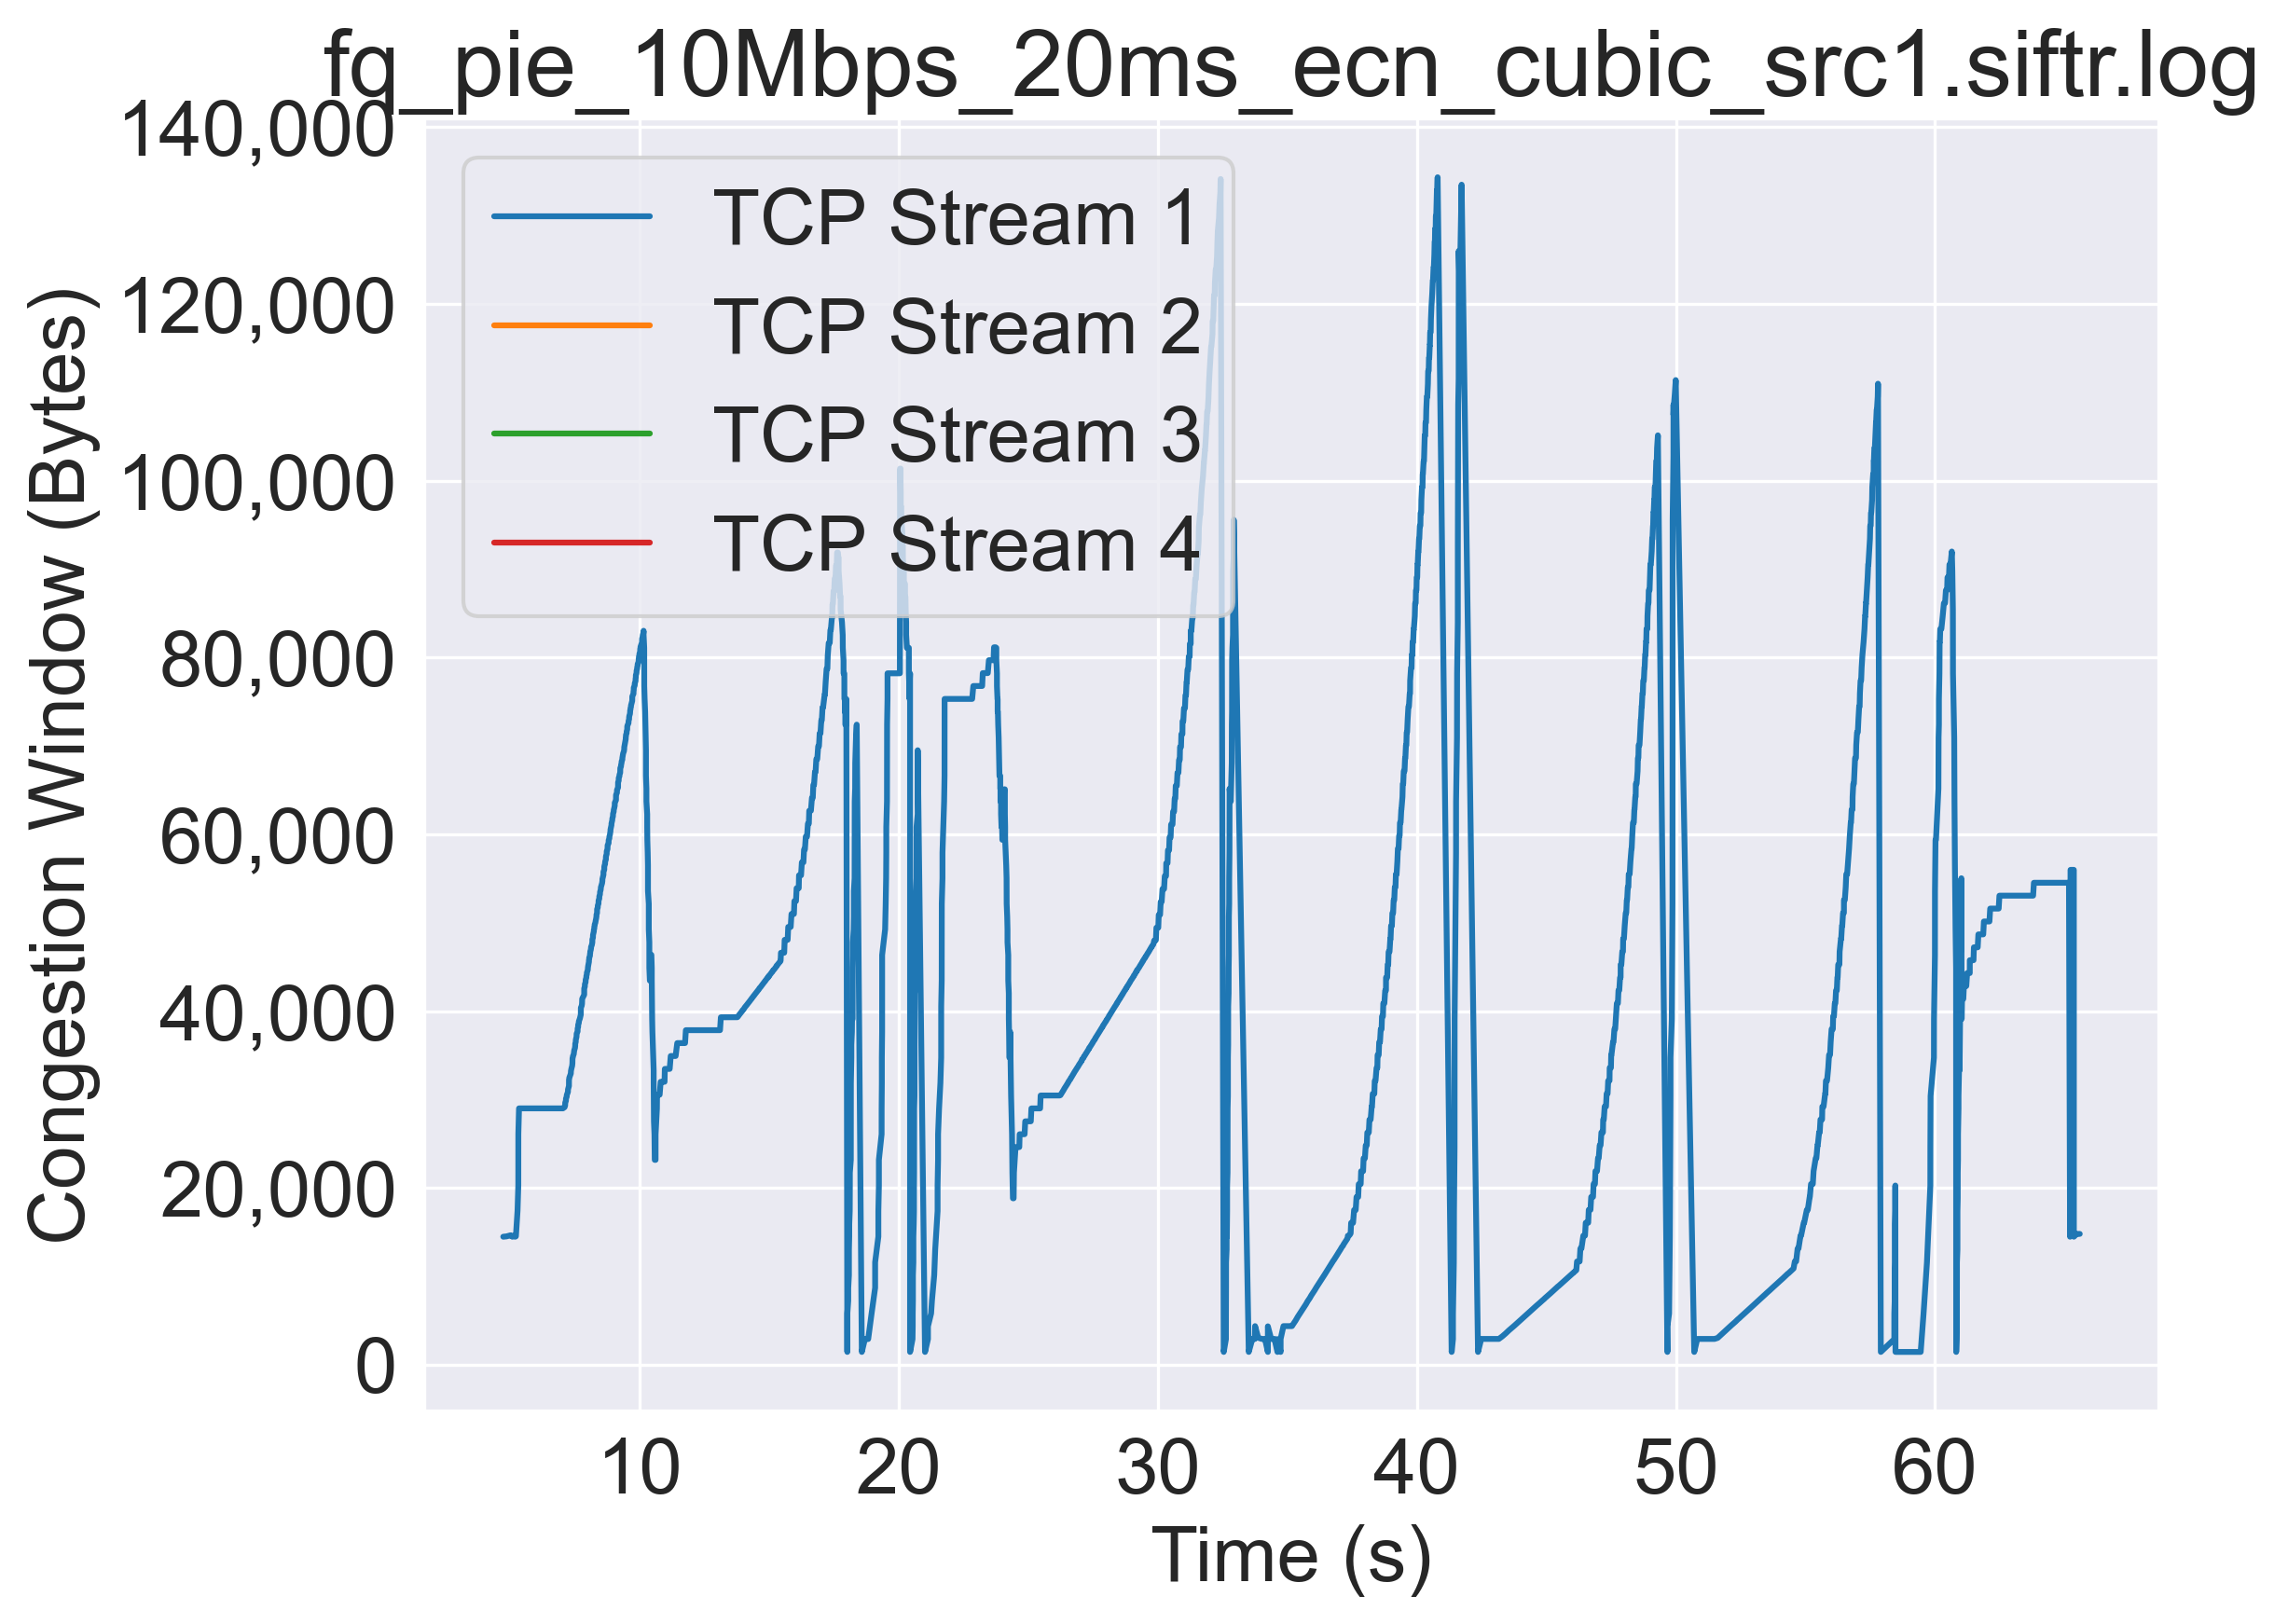

fq_pie_1Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/fq_pie_1Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


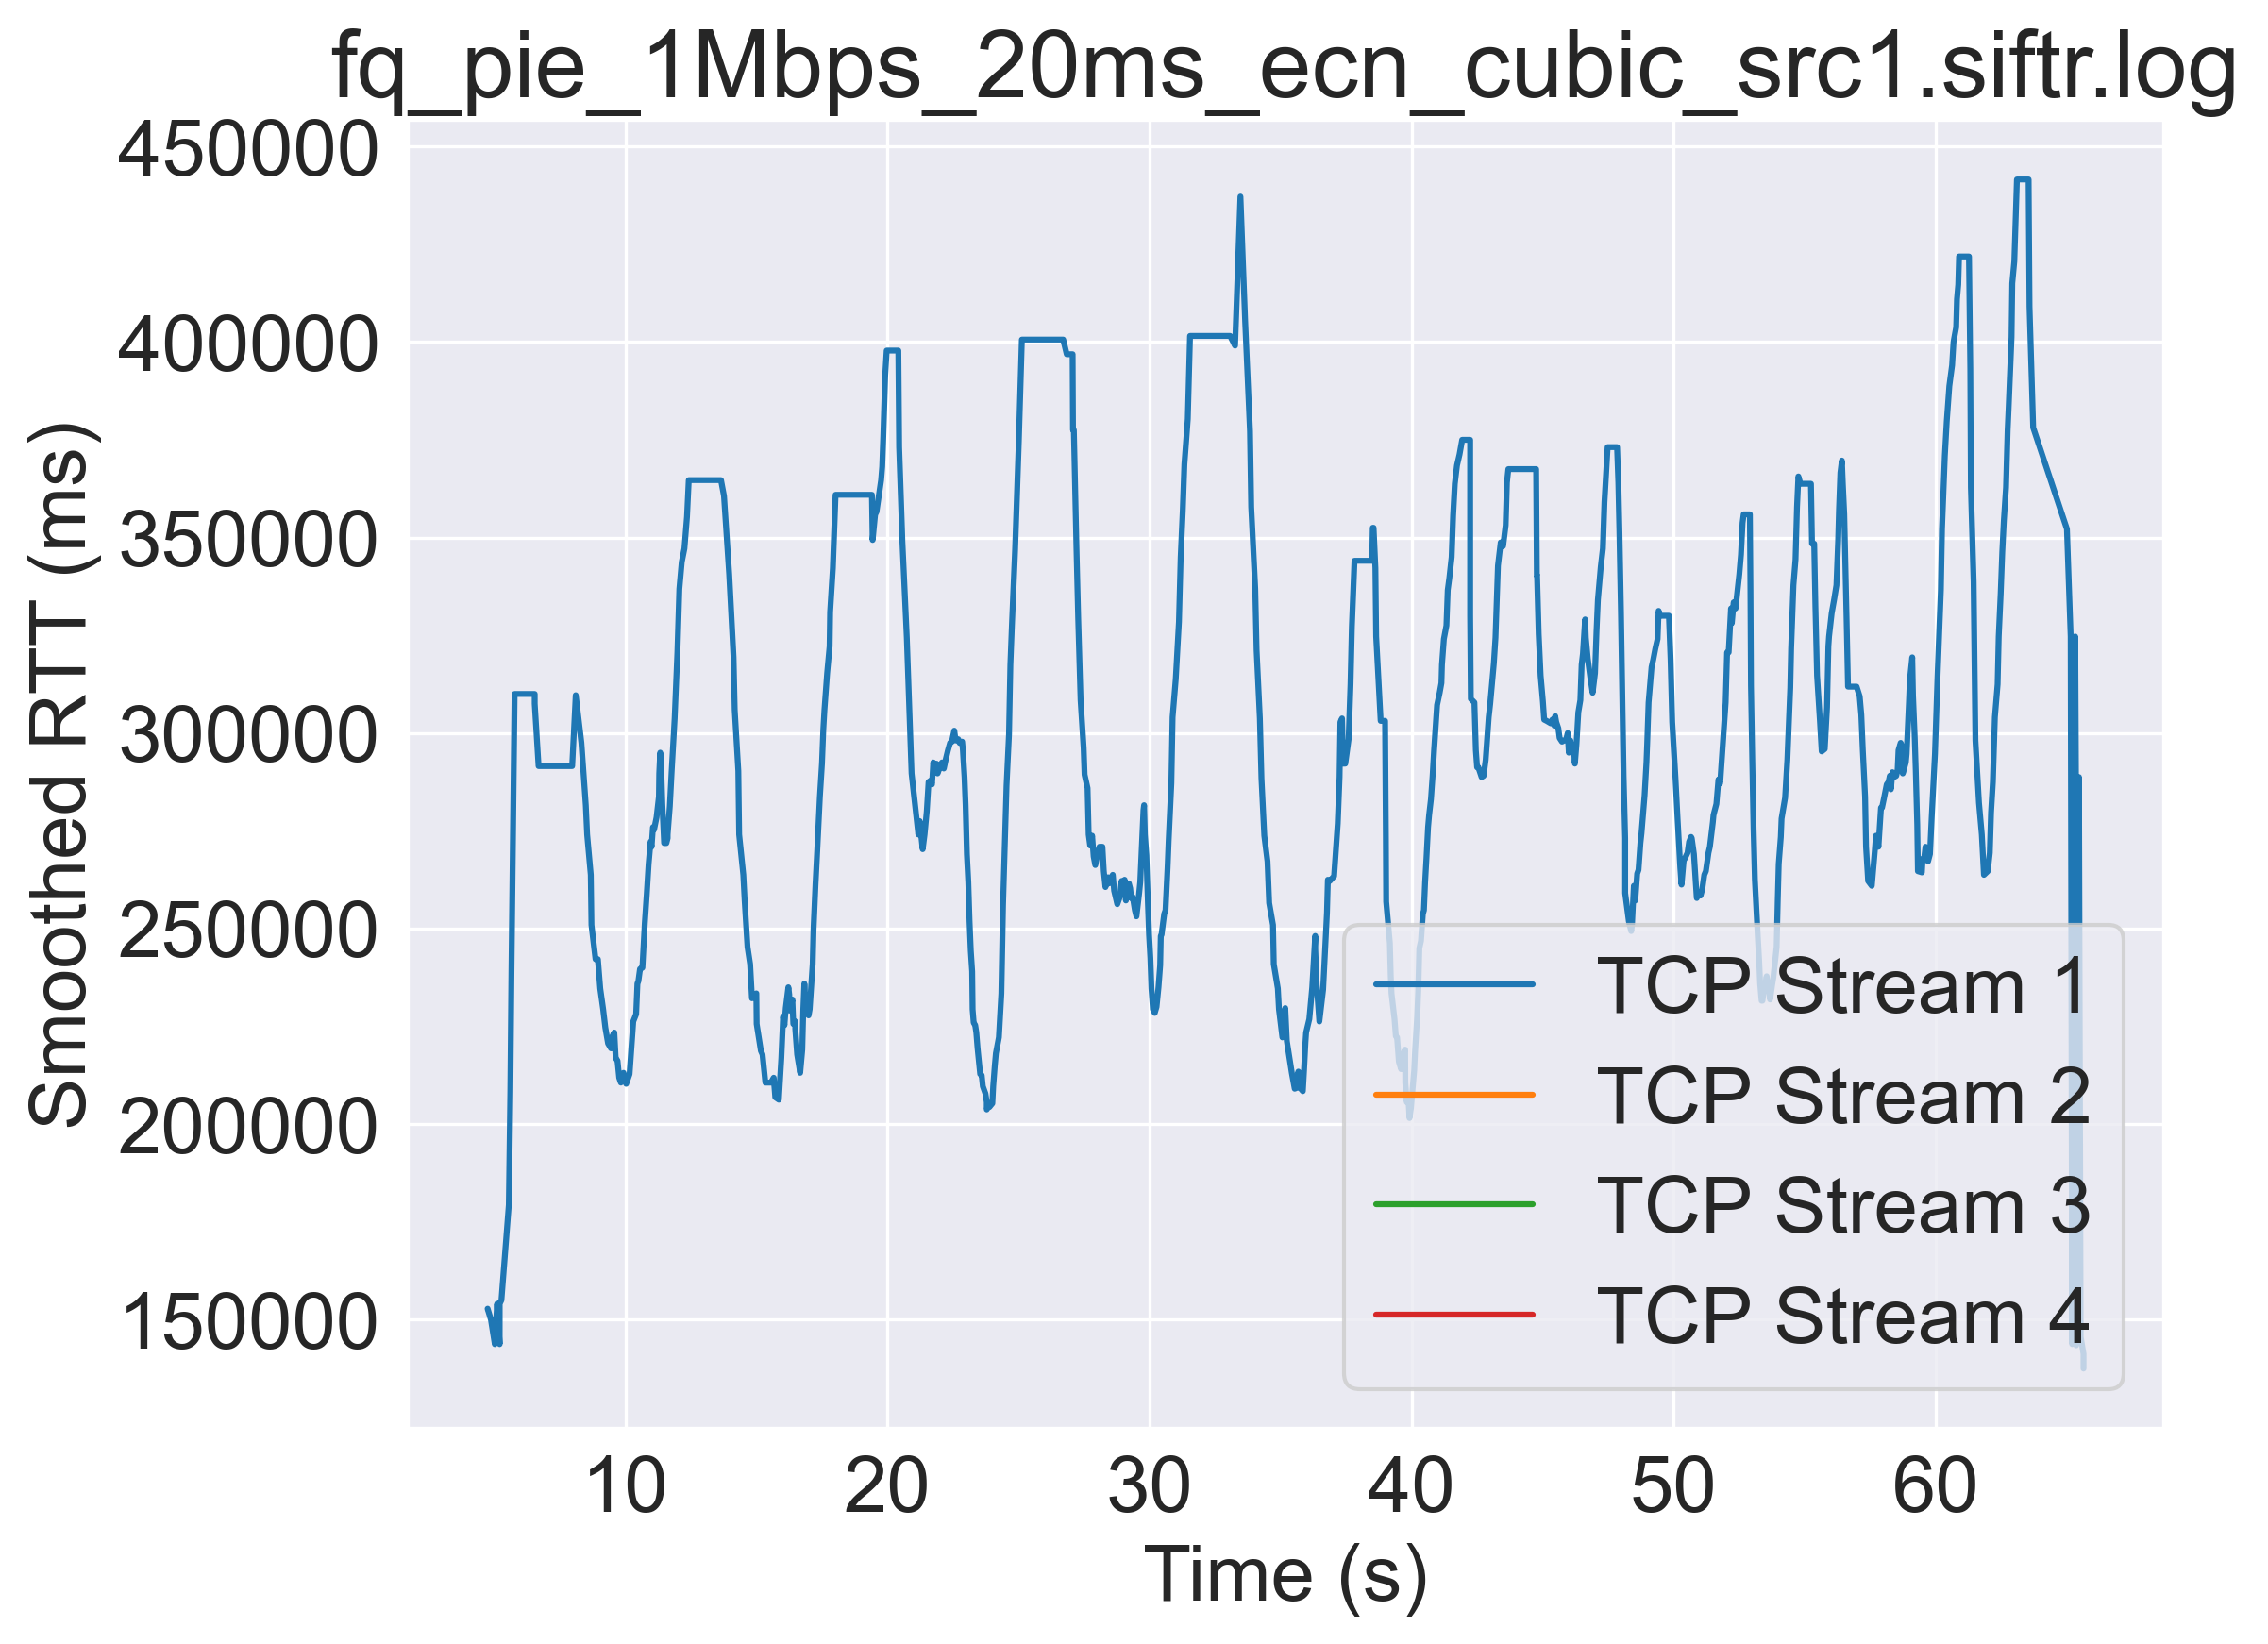

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


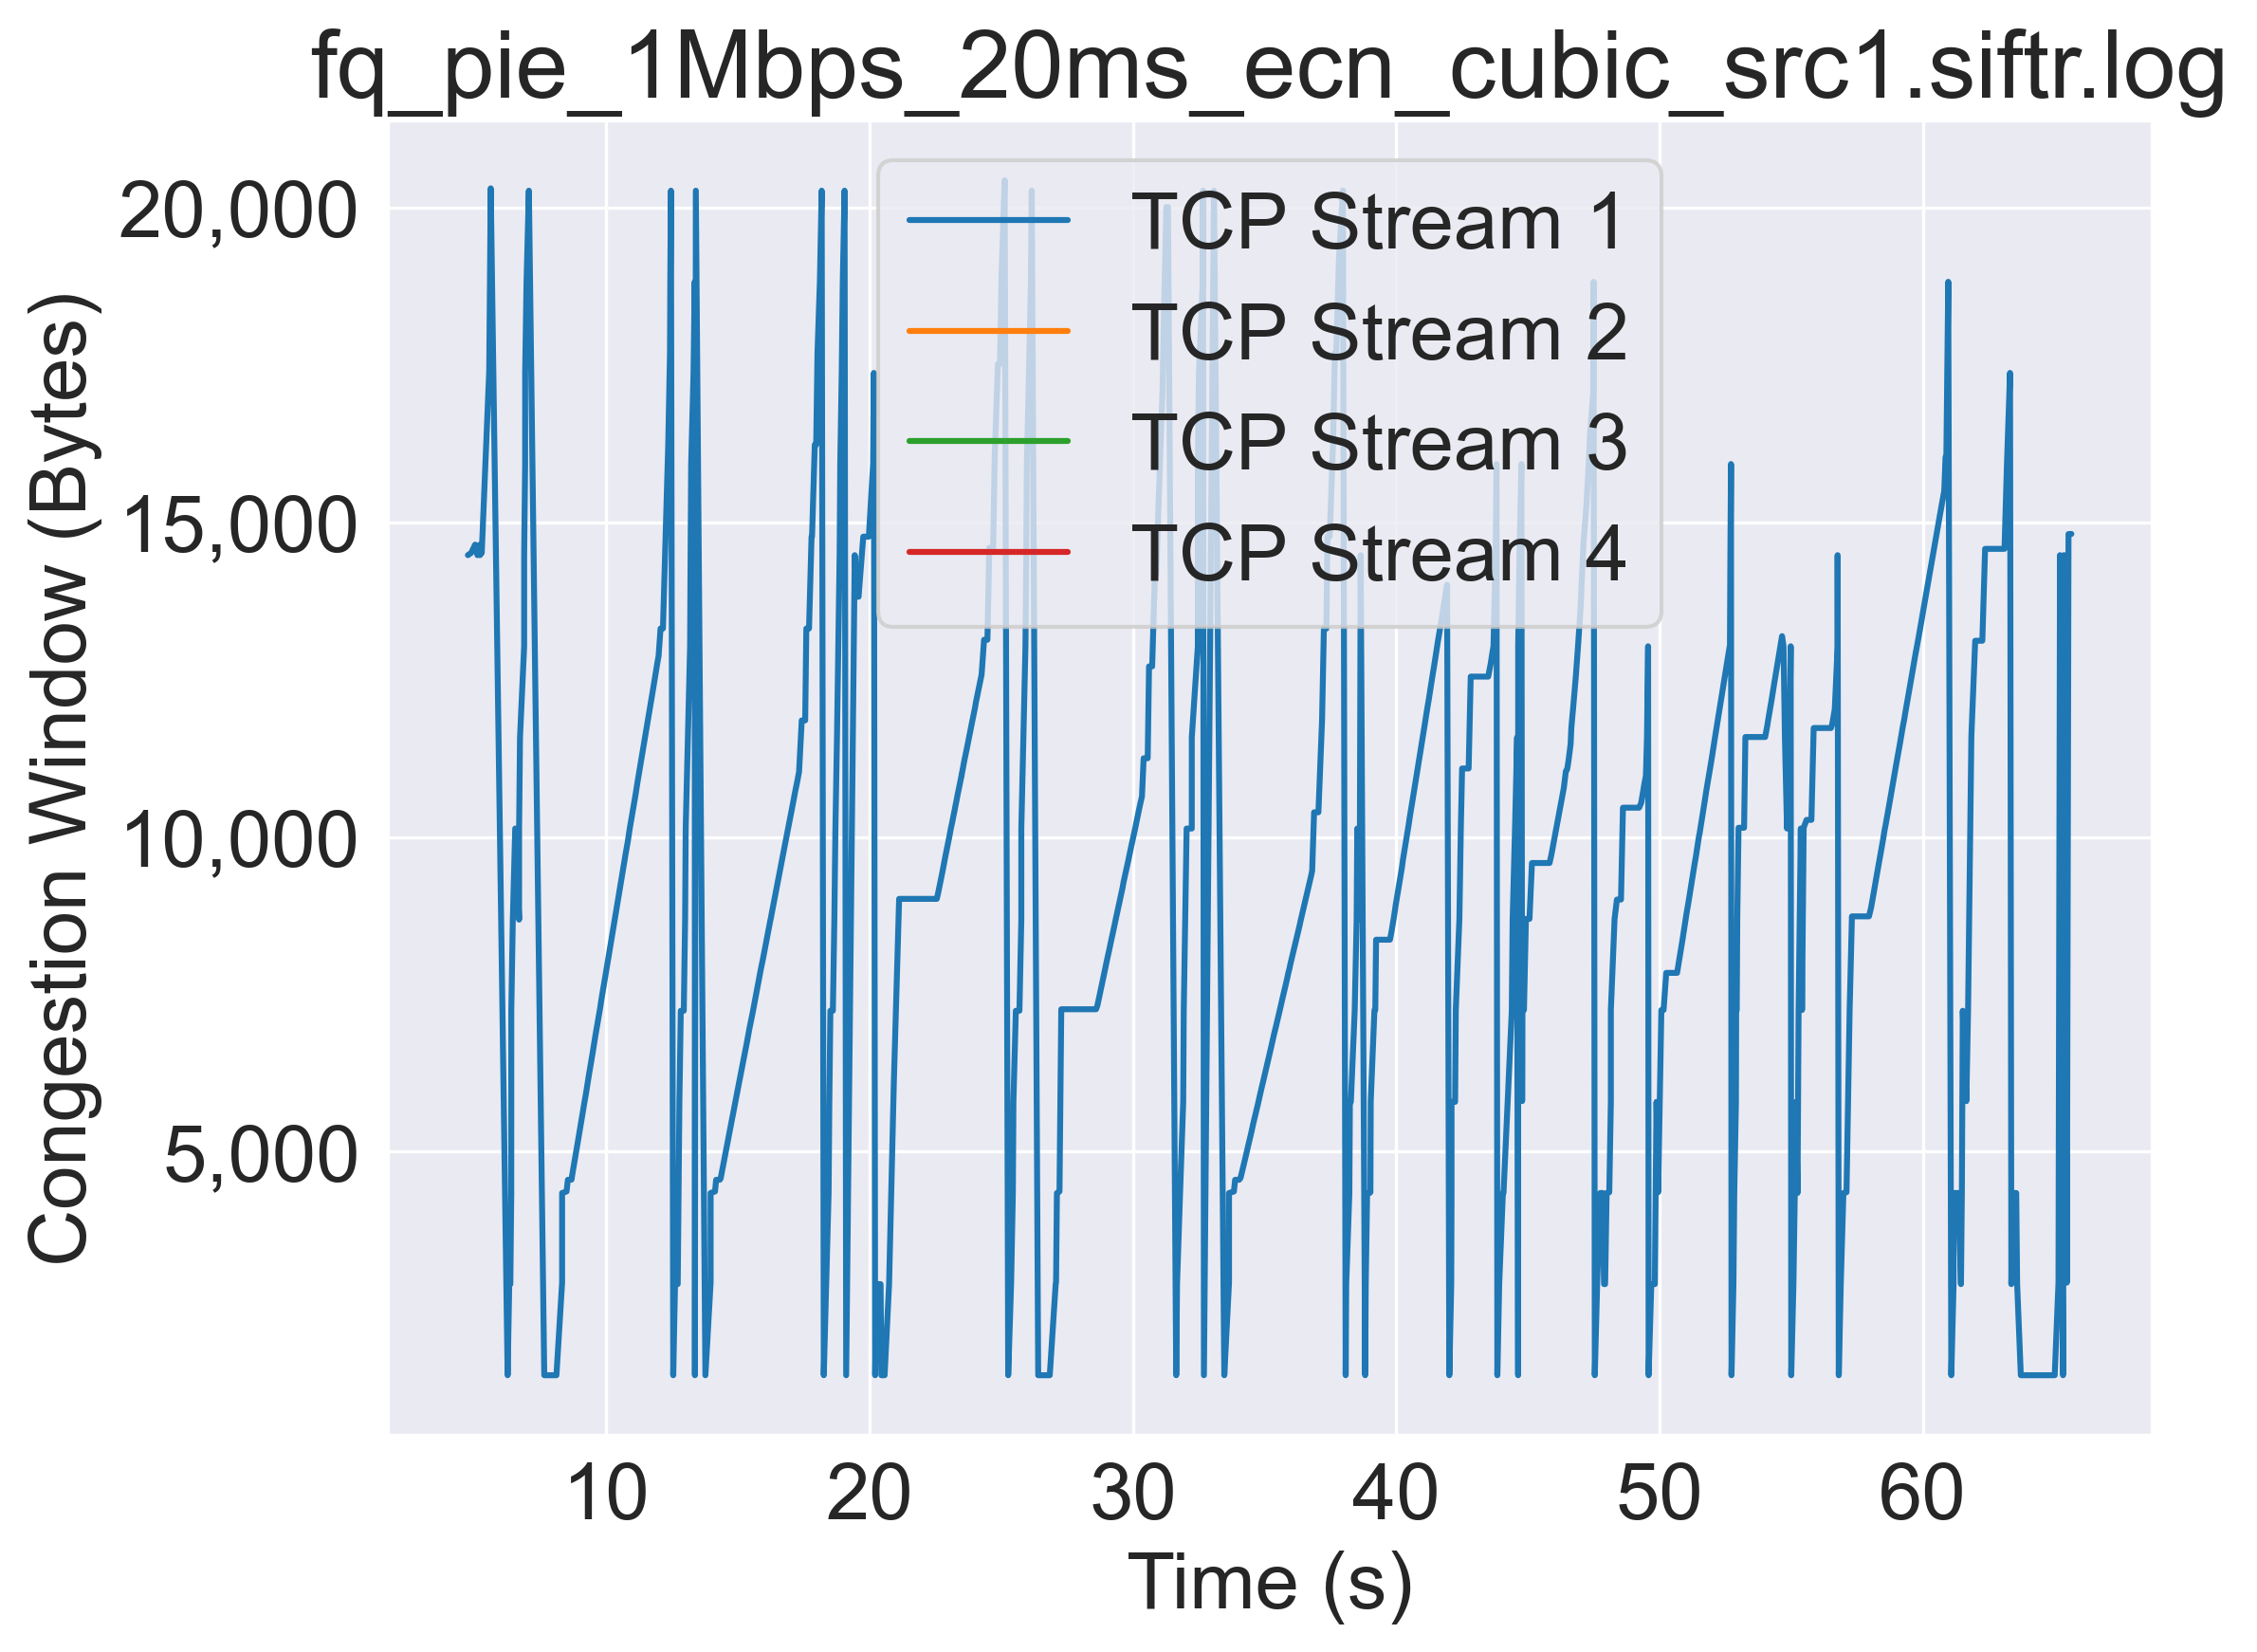

l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/l4s_10Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


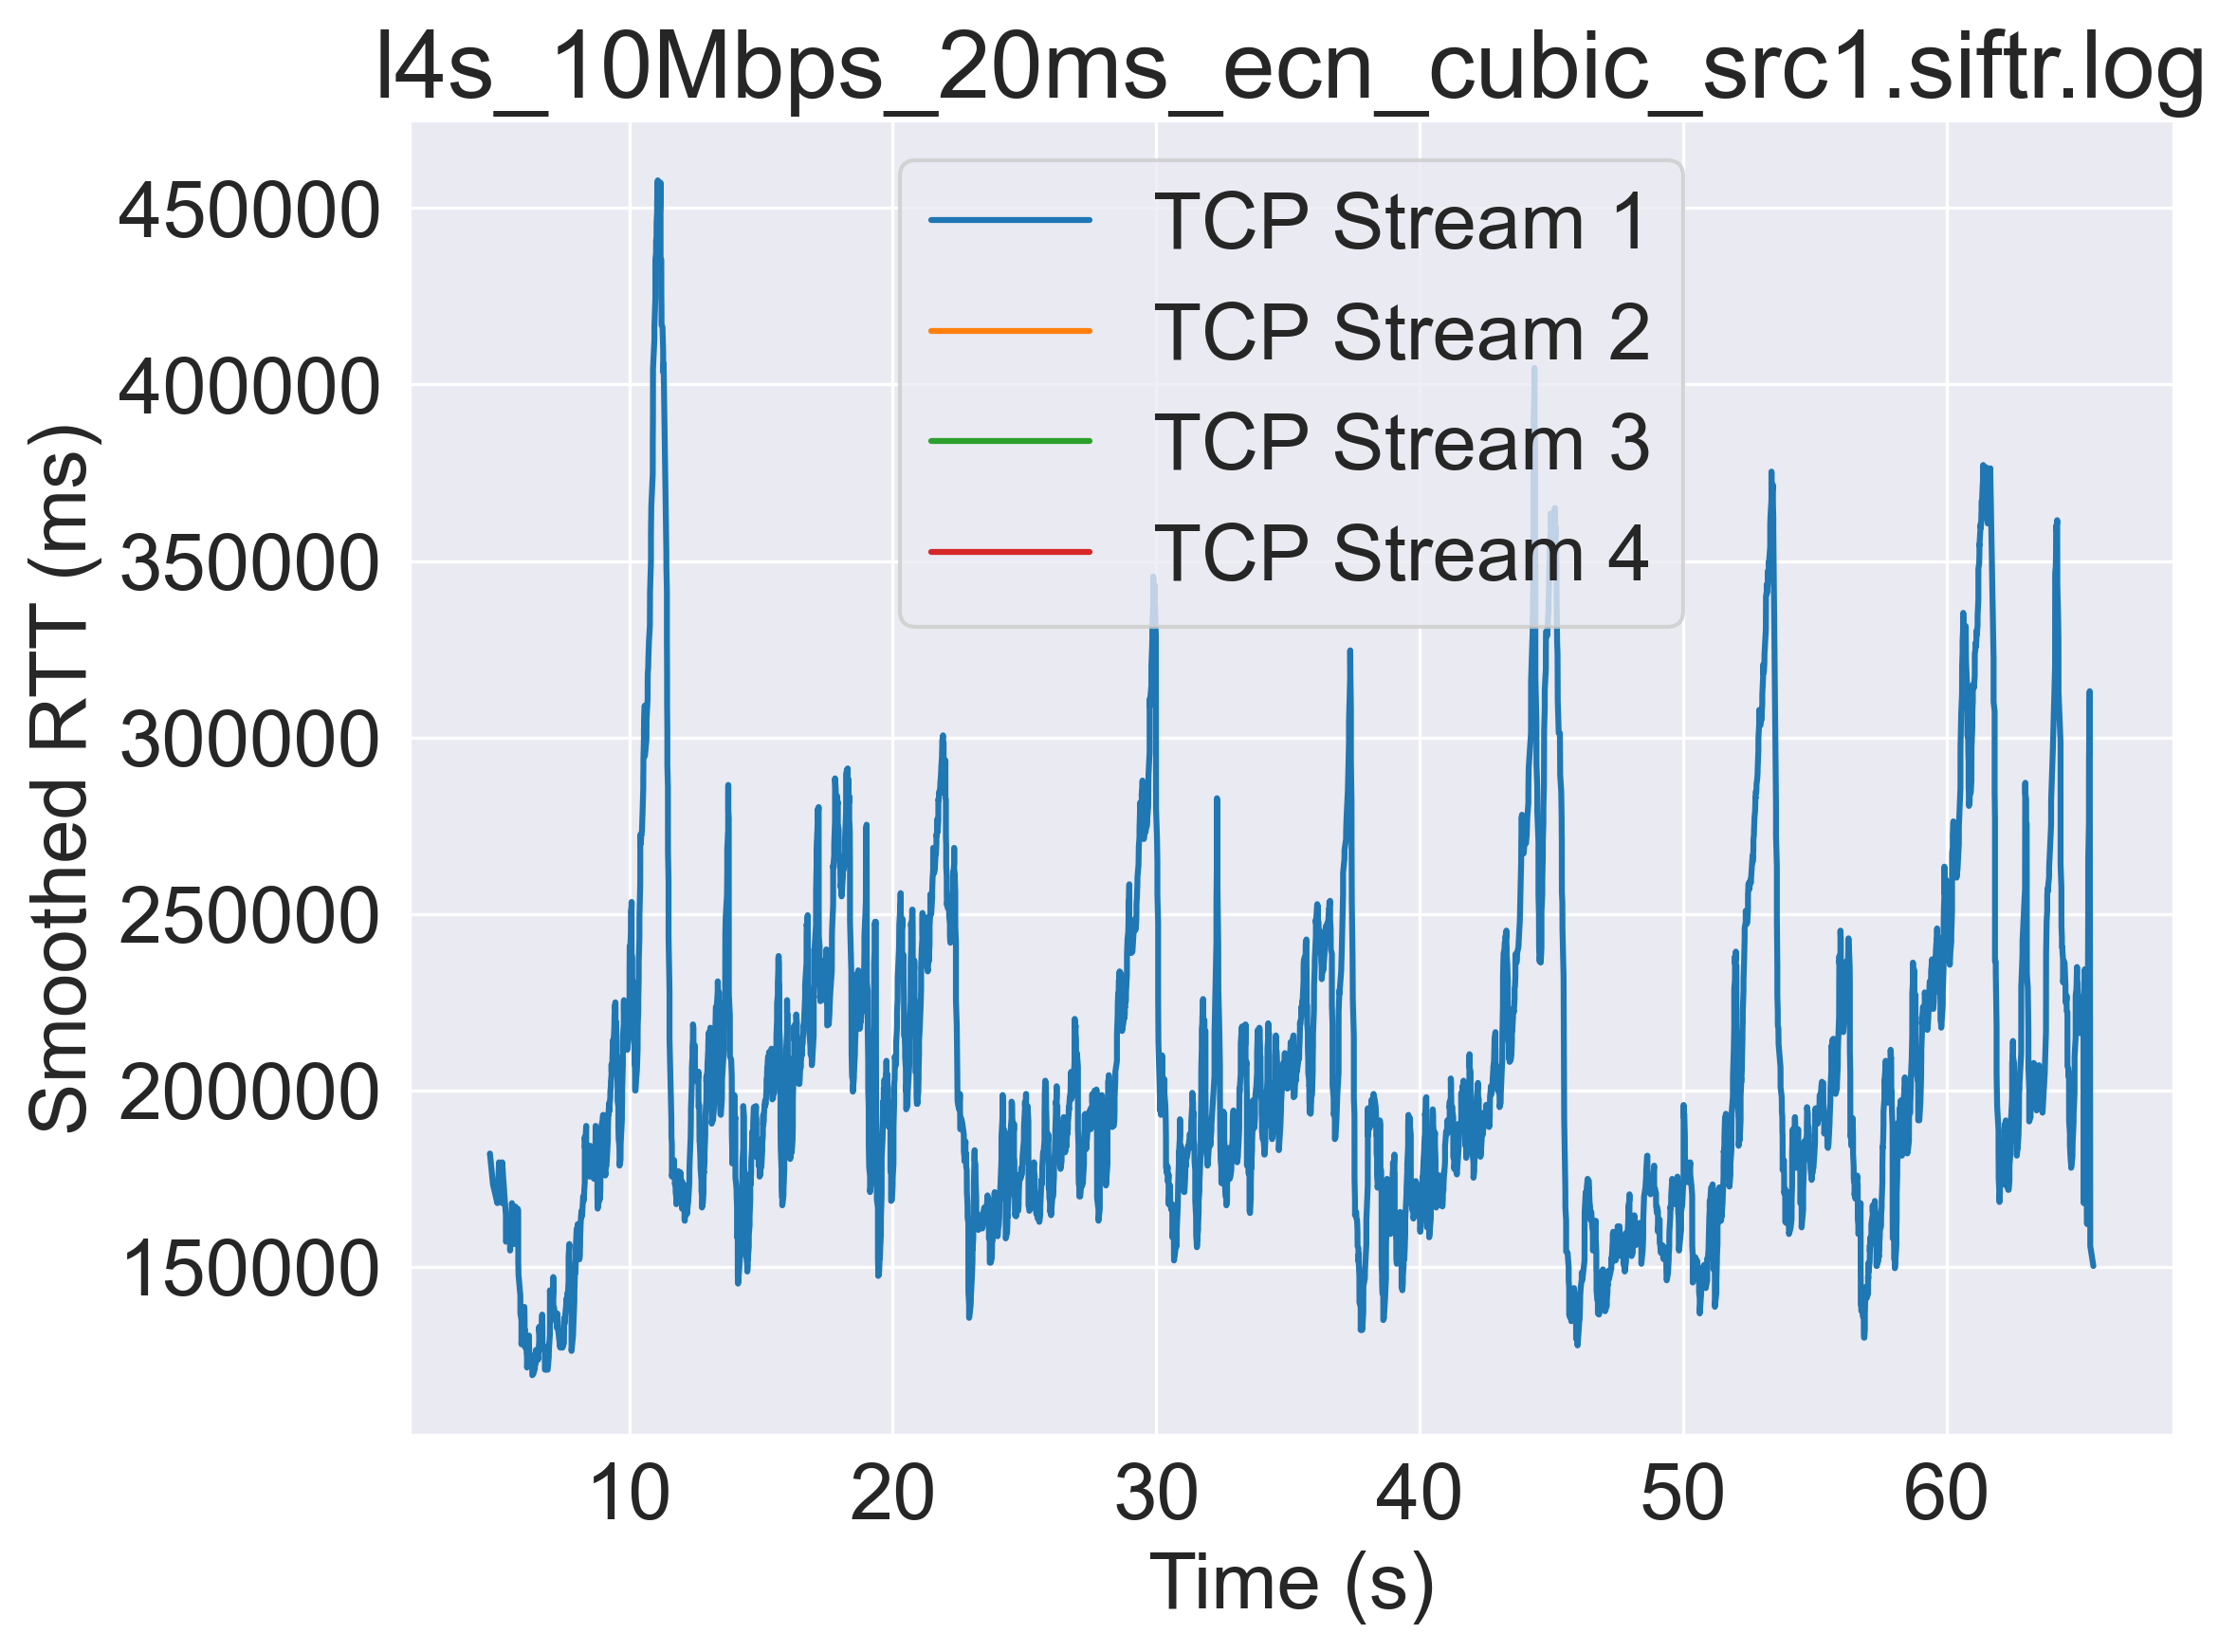

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


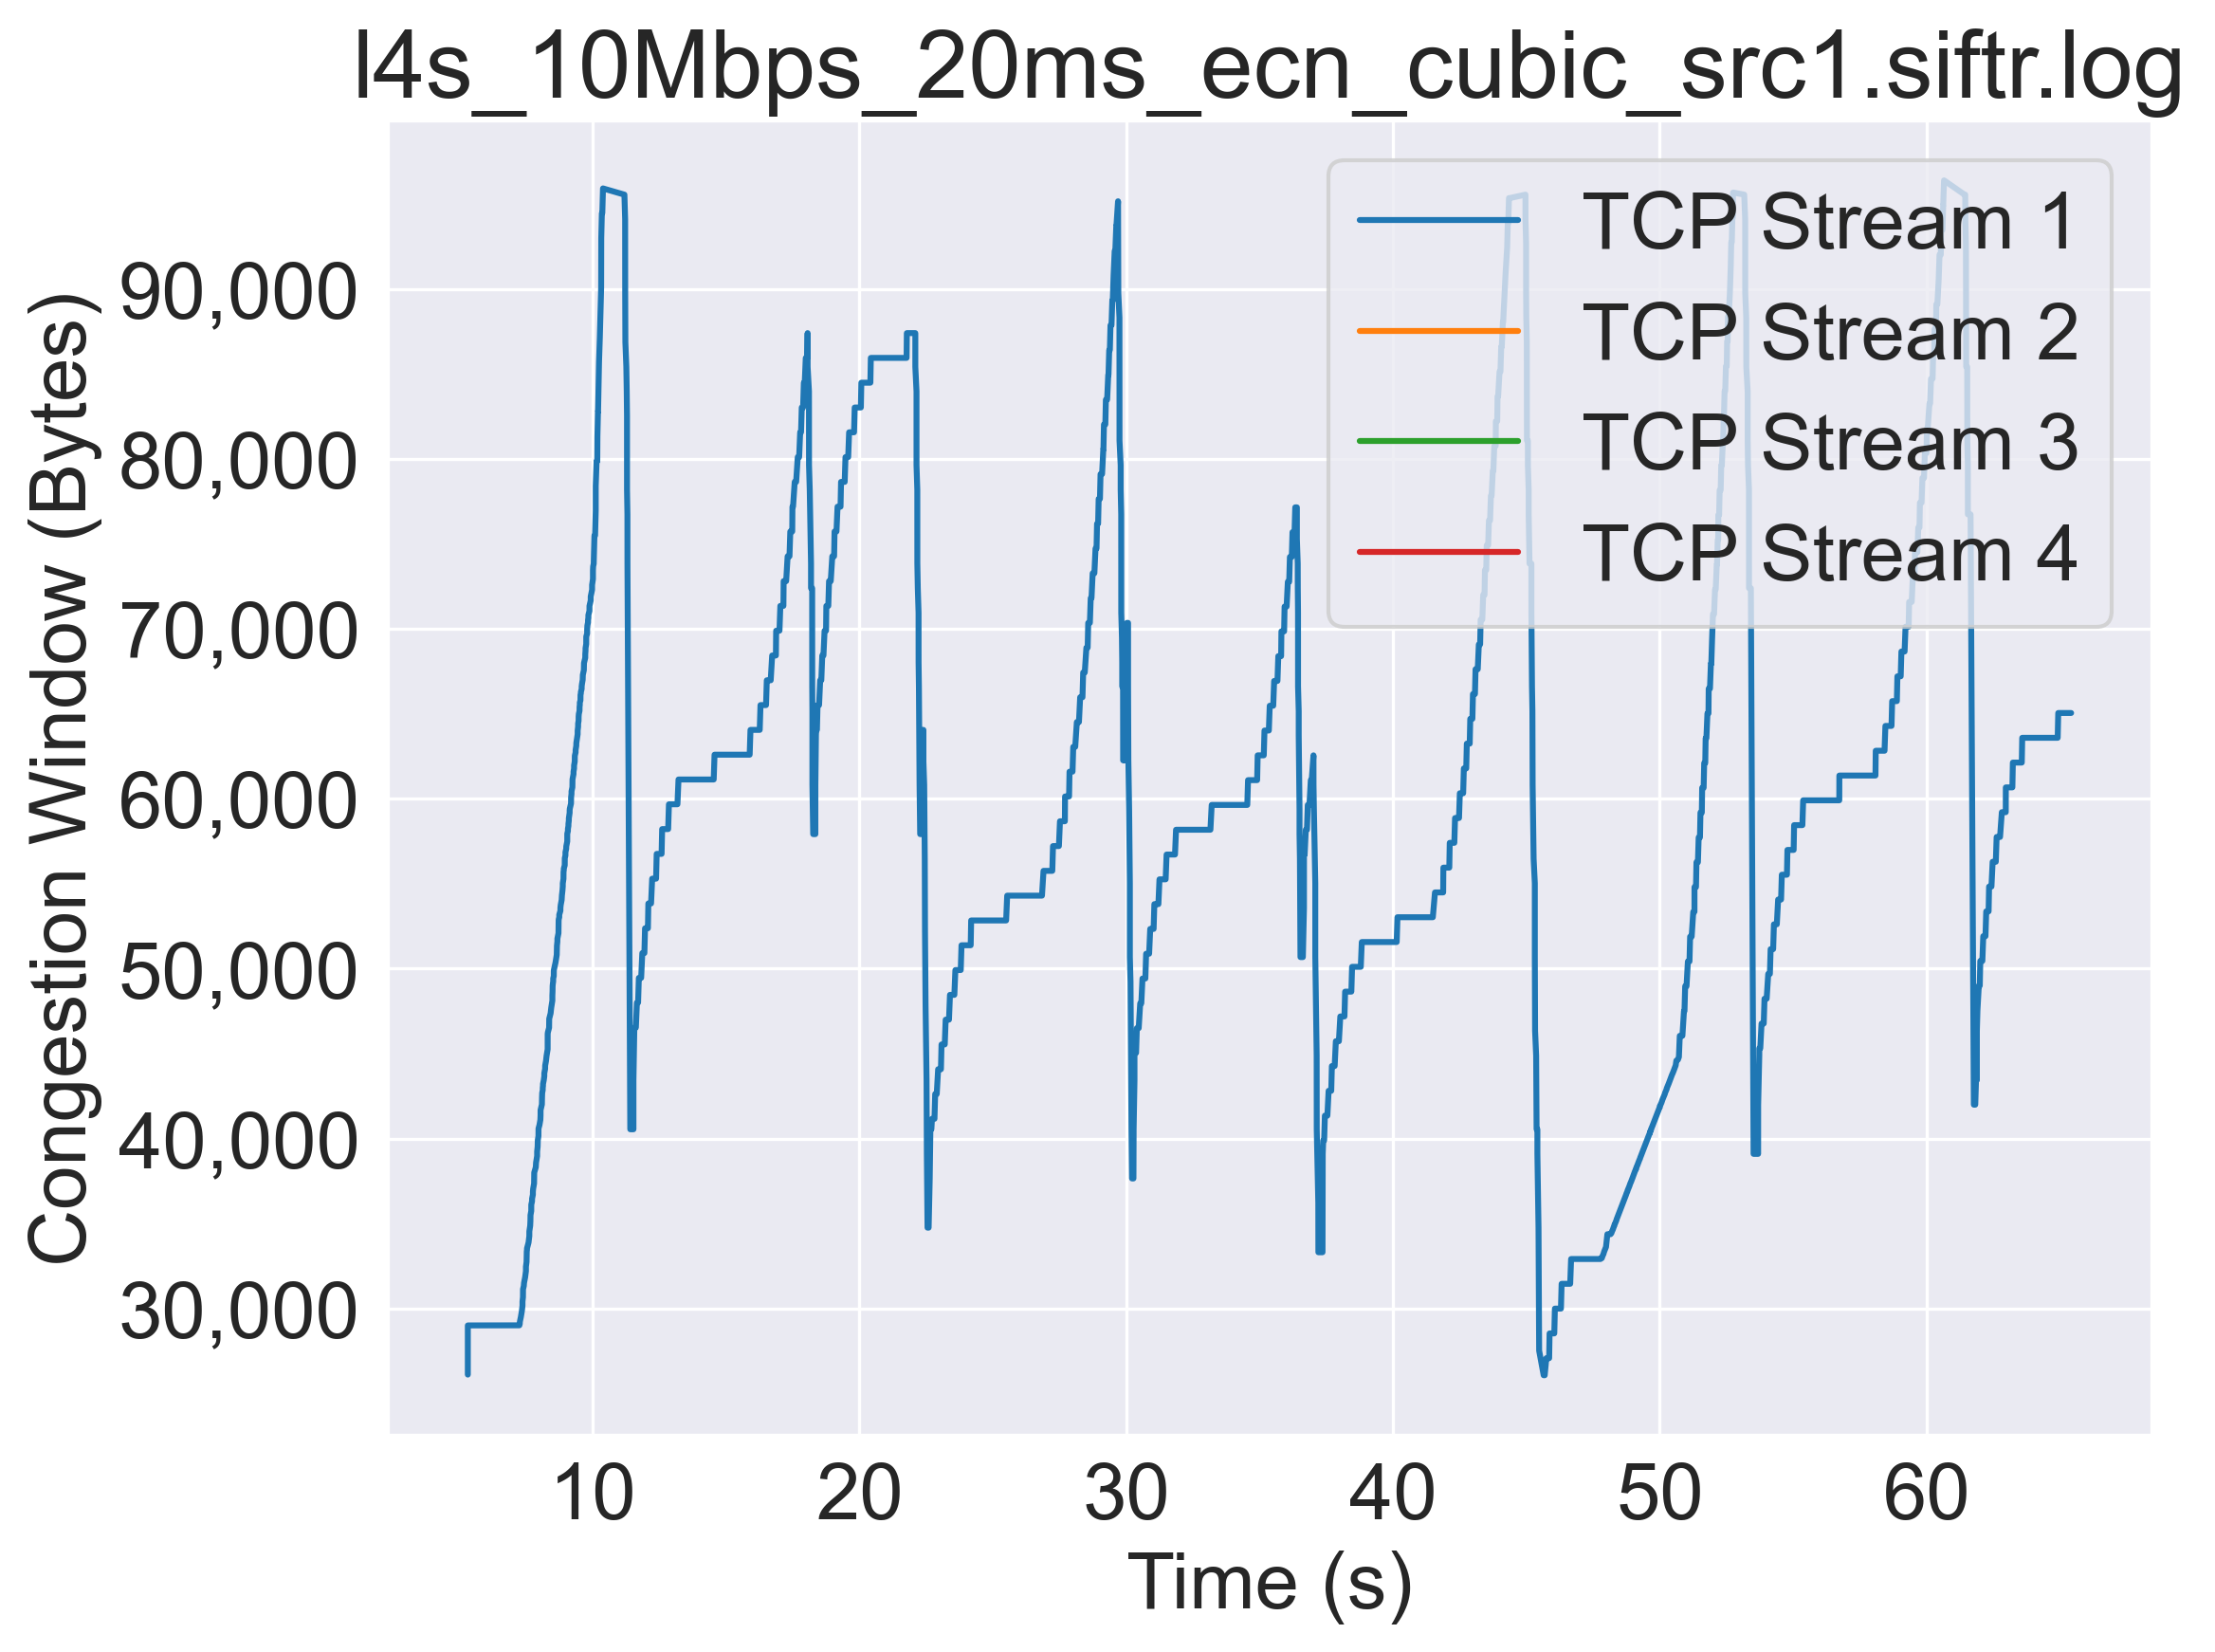

l4s_1Mbps_20ms_ecn_cubic_src1.siftr.log
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: SmoothedRTT, dtype: float64
Series([], Name: SmoothedRTT, dtype: float64)
Series([], Name: SmoothedRTT, dtype: float64)
Statistics saved to ./stats/l4s_1Mbps_20ms_ecn_cubic_src1.siftr.log_statistics_results.txt


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


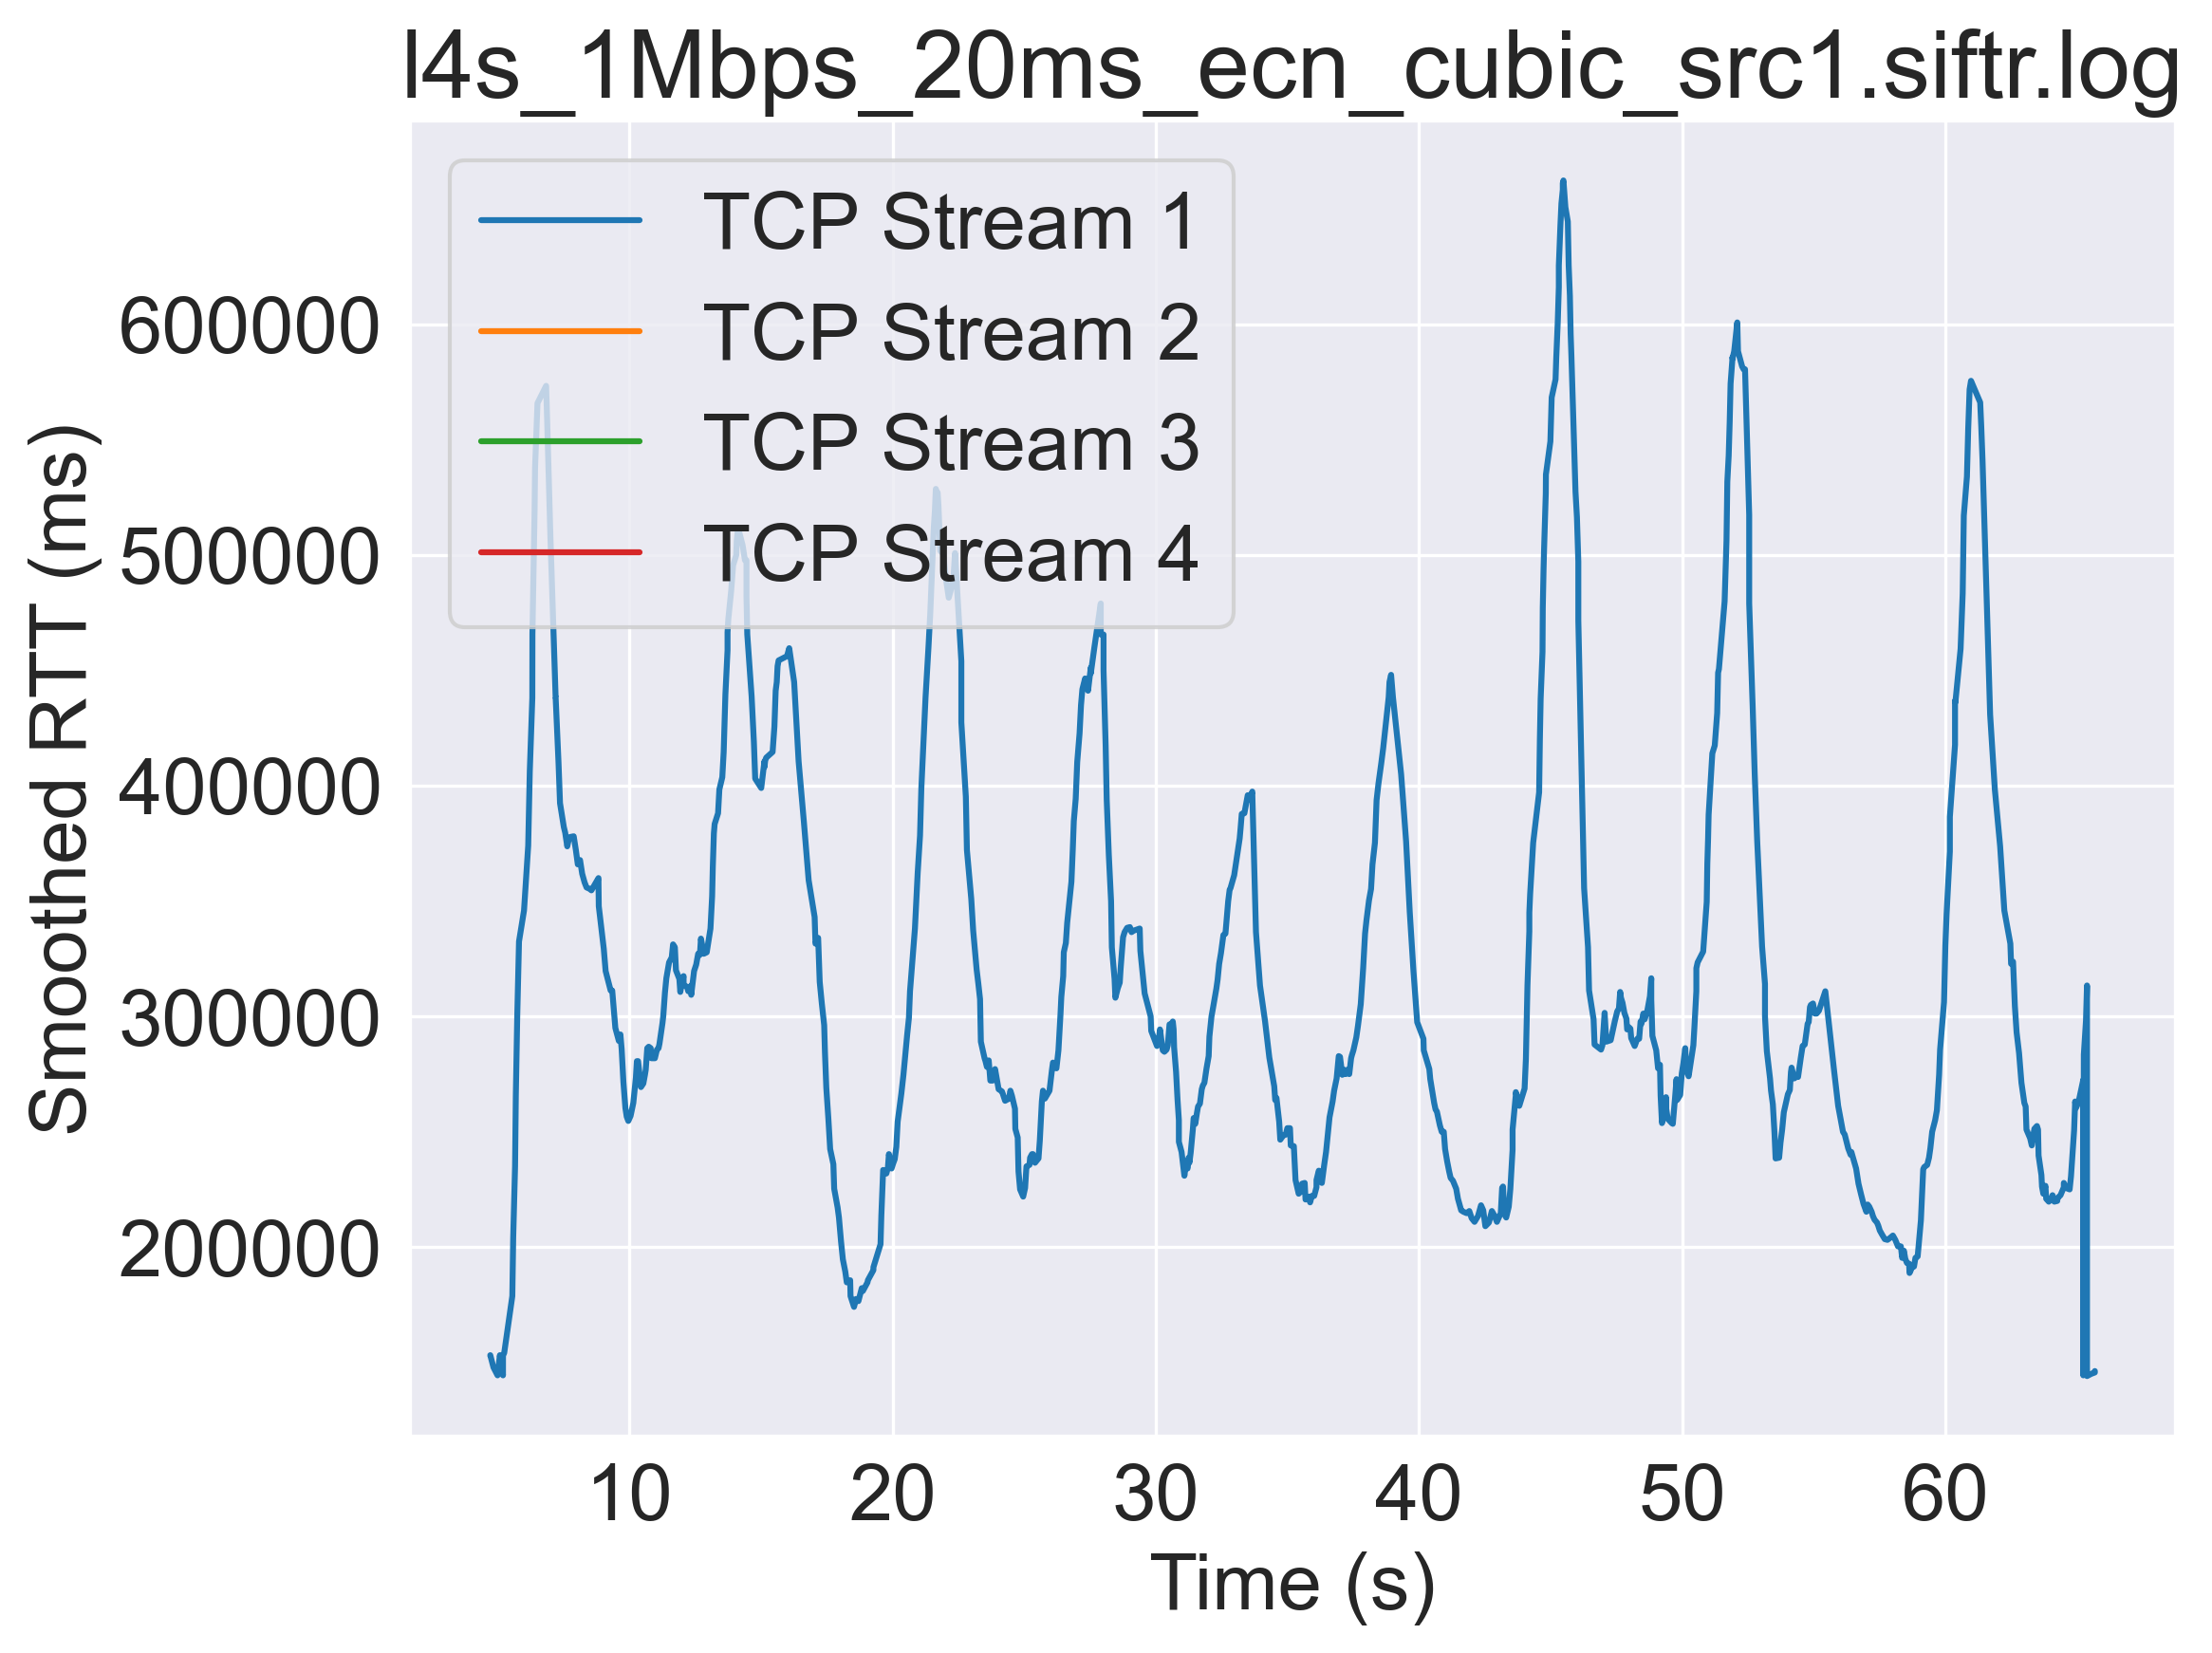

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


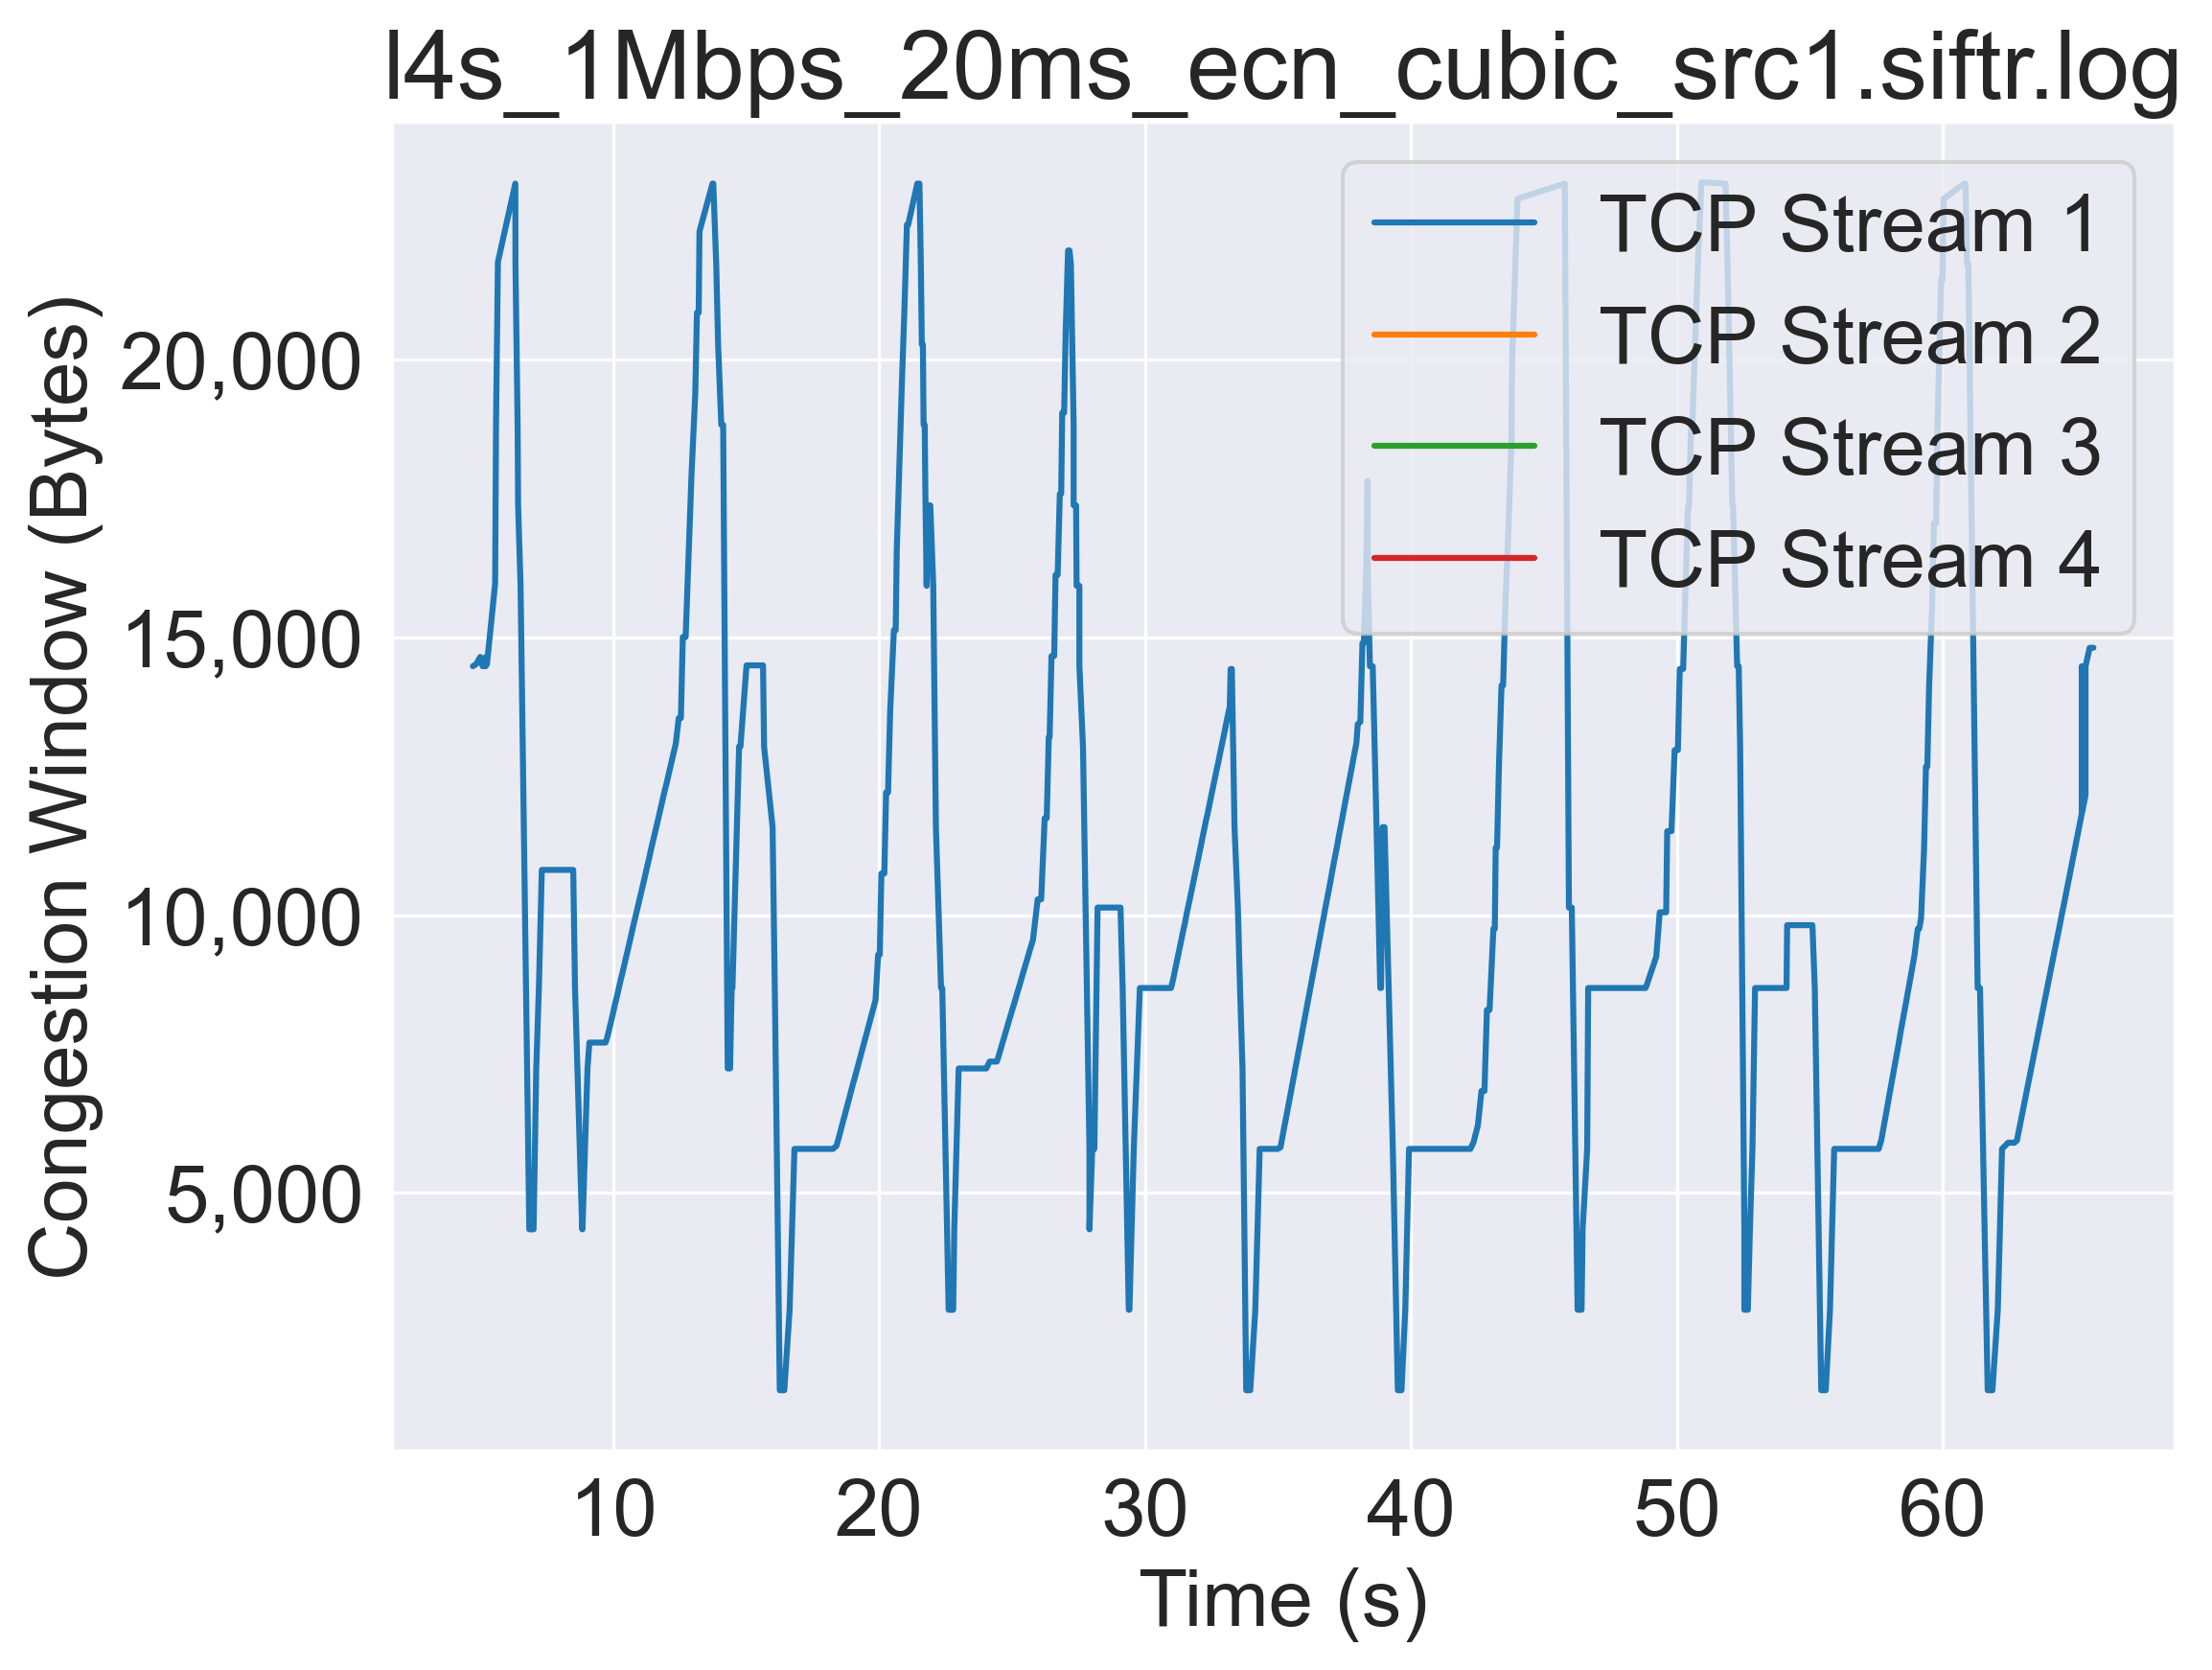

In [232]:
dataframe_list=[]
data_filename_list=[]
data_dict={}
for index in range(len(filenames)):
    # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
    data = []
    with open(filepaths[index], 'r') as f:
        # store the data
        for line in f:
            tem = re.sub(r'\s', '', line)
            data.append(tem.split(','))
    # remove file line of data
    print(filenames[index])
    data.pop(0)
    data.pop(len(data)-1)


    enable_time_secs = 1716792031
    enable_time_usecs = 61770
    siftver = '1.3.0'
    sysname = 'FreeBSD'
    sysver = 1301000
    ipmode = 4



    df = pd.DataFrame(data, columns=col)

    df=df[df['Direction']=='o']

    # congestion window to int
    df = df.astype({'CongestionWindow': 'int32'})
    
    # Convert 'Time' column to float64 type
    df['Time'] = df['Time'].astype('float64')

    # Subtract the first time entry from all the entries in 'Time' column
    df['Time'] = df['Time'] - df['Time'].iloc[0]



    # remove rows that congestion window bigger than 70000
    # df = df[df['CongestionWindow'].astype(int) < 70000]
    # RTT divide by tcp_rtt_scale * hz
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
    df['SmoothedRTT'] = (df['SmoothedRTT'] / 1000000
    df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



    # first path ForeignPort = 5101
    dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

    # second path localip = 5102
    dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

    # third path ForeignPort = 5101
    dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

    # fourth path localip = 5102
    dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
    # data_filename_list.append(filenames[index])
    # dataframe_list.append(dfPath1.copy())
    # data_dict[filenames[index]]=dfPath1.copy()
    print(dfPath4['SmoothedRTT'].describe())
    print(dfPath4['SmoothedRTT'].head(5))
    print(dfPath4['SmoothedRTT'].tail(5))

    # Darker color-blind-friendly palette
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    # Different line styles and markers
    line_styles = ['-', '--', '-.', ':']
    #line_styles = ['-', '-', '-', '-']
    markers = ['o', 's', '^', 'D']

    


    

    # Plot Smoothed RTT vs Time
    #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
    sns.set_style("darkgrid")  # Set the style to darkgrid

    # if "10Mbps" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,1*100)
    # elif "1Mbps" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,1.5*100)
    # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,2.7*100)
    #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,5.2*100)
    #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
    # plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
    #              color=colors[0], linestyle=line_styles[0])
    # plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
    #              color=colors[1], linestyle=line_styles[1])
    # plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
    #              color=colors[2], linestyle=line_styles[2])
    # plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
    #              color=colors[3], linestyle=line_styles[3])
    # Function to calculate statistics
    def calculate_statistics(df):
        median = df['SmoothedRTT'].median()
        mean = df['SmoothedRTT'].mean()
        q25 = df['SmoothedRTT'].quantile(0.25)
        q75 = df['SmoothedRTT'].quantile(0.75)
        minimum = df['SmoothedRTT'].min()
        maximum = df['SmoothedRTT'].max()
        
        return {
            'Median': median,
            'Mean': mean,
            '25th Percentile': q25,
            '75th Percentile': q75,
            'Minimum': minimum,
            'Maximum': maximum
        }

    # Calculate statistics for each DataFrame
    statistics_dfPath1 = calculate_statistics(dfPath1)
    statistics_dfPath2 = calculate_statistics(dfPath2)
    statistics_dfPath3 = calculate_statistics(dfPath3)
    statistics_dfPath4 = calculate_statistics(dfPath4)

    # Define the filename to save results
    stats_filename = "./stats/"+filenames[index]+'_statistics_results.txt'

    # Function to save statistics to a file
    def save_statistics_to_file(stats_filename, statistics,title):
        with open(stats_filename, 'a') as f:
            f.write("Statistics for "+title+":\n")
            for key, value in statistics.items():
                f.write(f"{key}: {value}\n")
            f.write("\n")

    # Save statistics for each DataFrame to the file
    save_statistics_to_file(stats_filename, statistics_dfPath1, "TCP Stream 1")
    save_statistics_to_file(stats_filename, statistics_dfPath2, "TCP Stream 2")
    save_statistics_to_file(stats_filename, statistics_dfPath3, "TCP Stream 3")
    save_statistics_to_file(stats_filename, statistics_dfPath4, "TCP Stream 4")

    print(f"Statistics saved to {stats_filename}")
    
    plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
                 color=colors[0])
    plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
                 color=colors[1])
    plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
                 color=colors[2])
    plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
                 color=colors[3])
    
    plt.xlabel('Time (s)')
    plt.ylabel('Smoothed RTT (ms)')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
    plt.show()

    dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
    dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
    dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
    dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

    # Plot CWND vs Time
    #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
    plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
    sns.set_style("darkgrid")  # Set the style to darkgrid


    # if contains_1_or_2(filenames[index]) == 1:
    #     plt.xlim(0,100)
    #     plt.ylim(0,140000)
    # elif contains_1_or_2(filenames[index]) == 2:
    #     plt.xlim(0,100)
    #     plt.ylim(0,140000)

    # if "10Mbps" in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,180000)
    # elif "1Mbps" in filenames[index] and "pie_1Mbps_20ms_ecn" not in filenames[index] and "codel_1Mbps_20ms_ecn" not in filenames[index]:
    #     plt.xlim(0,100)
    #     plt.ylim(0,35000)
    # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
    #     # plt.xlim(0,100)
    #     # plt.ylim(0,2.7)
    #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
    #     # plt.xlim(0,100)
    #     # plt.ylim(0,4.2)
    #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    

    
   
    plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
                 color=colors[0])
    plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
                 color=colors[1])
    plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
                 color=colors[2])
    plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
                 color=colors[3])
    import matplotlib.ticker as ticker
    # Format y-axis labels with commas
    def comma_format(x, pos):
        return f'{int(x):,}'

    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))



    # from matplotlib.ticker import ScalarFormatter
    
    # colors = ['blue', 'green', 'red', 'purple']

    # fig, ax = plt.subplots()

    # ax.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1')
    # ax.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2')
    # ax.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3')
    # ax.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4')

    # # Use scientific notation in the form of 10^x
    # formatter = ScalarFormatter(useMathText=True)
    # formatter.set_scientific(True)
    # formatter.set_powerlimits((0, 0))
    # ax.yaxis.set_major_formatter(formatter)

    # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window (Bytes)')
    plt.title(filenames[index])
    plt.legend()
    plt.grid(True)
    # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
    plt.savefig("./Graphs/"+filenames[index]+"_CWND.eps", dpi=300,bbox_inches='tight')
    plt.show()
    


In [233]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./client1_data/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     print(filenames[index])
#     data.pop(0)
#     data.pop(len(data)-1)


#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.3.0'
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     df=df[df['Direction']=='o']

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     # df['SmoothedRTT'] = (df['SmoothedRTT'] / (tcp_rtt_scale * hz))*100
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))

#     # Darker color-blind-friendly palette
#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
#     # Different line styles and markers
#     line_styles = ['-', '--', '-.', ':']
#     #line_styles = ['-', '-', '-', '-']
#     markers = ['o', 's', '^', 'D']

    


    

#     # Plot Smoothed RTT vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid

#     # if "10Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,1*100)
#     # elif "1Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,1.5*100)
#     # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,2.7*100)
#     #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,5.2*100)
#     #     # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
#     # plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#     #              color=colors[0], linestyle=line_styles[0])
#     # plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#     #              color=colors[1], linestyle=line_styles[1])
#     # plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#     #              color=colors[2], linestyle=line_styles[2])
#     # plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#     #              color=colors[3], linestyle=line_styles[3])
#     # Function to calculate statistics
#     def calculate_statistics(df):
#         median = df['SmoothedRTT'].median()
#         mean = df['SmoothedRTT'].mean()
#         q25 = df['SmoothedRTT'].quantile(0.25)
#         q75 = df['SmoothedRTT'].quantile(0.75)
#         minimum = df['SmoothedRTT'].min()
#         maximum = df['SmoothedRTT'].max()
        
#         return {
#             'Median': median,
#             'Mean': mean,
#             '25th Percentile': q25,
#             '75th Percentile': q75,
#             'Minimum': minimum,
#             'Maximum': maximum
#         }

#     # Calculate statistics for each DataFrame
#     statistics_dfPath1 = calculate_statistics(dfPath1)
#     statistics_dfPath2 = calculate_statistics(dfPath2)
#     statistics_dfPath3 = calculate_statistics(dfPath3)
#     statistics_dfPath4 = calculate_statistics(dfPath4)

#     # Define the filename to save results
#     stats_filename = "./stats/"+filenames[index]+'_statistics_results.txt'

#     # Function to save statistics to a file
#     def save_statistics_to_file(stats_filename, statistics,title):
#         with open(stats_filename, 'a') as f:
#             f.write("Statistics for "+title+":\n")
#             for key, value in statistics.items():
#                 f.write(f"{key}: {value}\n")
#             f.write("\n")

#     # Save statistics for each DataFrame to the file
#     save_statistics_to_file(stats_filename, statistics_dfPath1, "TCP Stream 1")
#     save_statistics_to_file(stats_filename, statistics_dfPath2, "TCP Stream 2")
#     save_statistics_to_file(stats_filename, statistics_dfPath3, "TCP Stream 3")
#     save_statistics_to_file(stats_filename, statistics_dfPath4, "TCP Stream 4")

#     print(f"Statistics saved to {stats_filename}")
    
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#                  color=colors[3])
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT (ms)')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
#     plt.show()

#     dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
#     dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
#     dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
#     dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

#     # Plot CWND vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid


#     # if contains_1_or_2(filenames[index]) == 1:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)
#     # elif contains_1_or_2(filenames[index]) == 2:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)

#     # if "10Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,180000)
#     # elif "1Mbps" in filenames[index] and "pie_1Mbps_20ms_ecn" not in filenames[index] and "codel_1Mbps_20ms_ecn" not in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,35000)
#     # if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#     #     # plt.xlim(0,100)
#     #     # plt.ylim(0,2.7)
#     #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     # if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#     #     # plt.xlim(0,100)
#     #     # plt.ylim(0,4.2)
#     #     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    

    
   
#     plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
#                  color=colors[3])
#     import matplotlib.ticker as ticker
#     # Format y-axis labels with commas
#     def comma_format(x, pos):
#         return f'{int(x):,}'

#     plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(comma_format))



#     # from matplotlib.ticker import ScalarFormatter
    
#     # colors = ['blue', 'green', 'red', 'purple']

#     # fig, ax = plt.subplots()

#     # ax.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1')
#     # ax.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2')
#     # ax.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3')
#     # ax.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4')

#     # # Use scientific notation in the form of 10^x
#     # formatter = ScalarFormatter(useMathText=True)
#     # formatter.set_scientific(True)
#     # formatter.set_powerlimits((0, 0))
#     # ax.yaxis.set_major_formatter(formatter)

#     # plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window (Bytes)')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.eps", dpi=300,bbox_inches='tight')
#     plt.show()
    


In [234]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./datatest1/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     print(filenames[index])
#     data.pop(0)
#     data.pop(len(data)-1)

#     # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
#     # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.2.4'
#     hz = 100
#     tcp_rtt_scale = 32
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     df=df[df['Direction']=='o']

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')

    



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))

#     # Darker color-blind-friendly palette
#     colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
#     # Different line styles and markers
#     line_styles = ['-', '--', '-.', ':']
#     #line_styles = ['-', '-', '-', '-']
#     markers = ['o', 's', '^', 'D']

    


    

#     # Plot Smoothed RTT vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid

#     if "10Mbps" in filenames[index]:
#         plt.xlim(0,100)
#         plt.ylim(0,1)
#     elif "1Mbps" in filenames[index]:
#         plt.xlim(0,100)
#         plt.ylim(0,1.5)
#     if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#         plt.xlim(0,100)
#         plt.ylim(0,2.7)
#         # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#     if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#         plt.xlim(0,100)
#         plt.ylim(0,4.2)
#         # plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    
#     # plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#     #              color=colors[0], linestyle=line_styles[0])
#     # plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#     #              color=colors[1], linestyle=line_styles[1])
#     # plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#     #              color=colors[2], linestyle=line_styles[2])
#     # plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#     #              color=colors[3], linestyle=line_styles[3])
#     # Function to calculate statistics
#     def calculate_statistics(df):
#         median = df['SmoothedRTT'].median()
#         mean = df['SmoothedRTT'].mean()
#         q25 = df['SmoothedRTT'].quantile(0.25)
#         q75 = df['SmoothedRTT'].quantile(0.75)
#         minimum = df['SmoothedRTT'].min()
#         maximum = df['SmoothedRTT'].max()
        
#         return {
#             'Median': median,
#             'Mean': mean,
#             '25th Percentile': q25,
#             '75th Percentile': q75,
#             'Minimum': minimum,
#             'Maximum': maximum
#         }

#     # Calculate statistics for each DataFrame
#     statistics_dfPath1 = calculate_statistics(dfPath1)
#     statistics_dfPath2 = calculate_statistics(dfPath2)
#     statistics_dfPath3 = calculate_statistics(dfPath3)
#     statistics_dfPath4 = calculate_statistics(dfPath4)

#     # Define the filename to save results
#     stats_filename = "./stats/"+filenames[index]+'_statistics_results.txt'

#     # Function to save statistics to a file
#     def save_statistics_to_file(stats_filename, statistics,title):
#         with open(stats_filename, 'a') as f:
#             f.write("Statistics for "+title+":\n")
#             for key, value in statistics.items():
#                 f.write(f"{key}: {value}\n")
#             f.write("\n")

#     # Save statistics for each DataFrame to the file
#     save_statistics_to_file(stats_filename, statistics_dfPath1, "TCP Stream 1")
#     save_statistics_to_file(stats_filename, statistics_dfPath2, "TCP Stream 2")
#     save_statistics_to_file(stats_filename, statistics_dfPath3, "TCP Stream 3")
#     save_statistics_to_file(stats_filename, statistics_dfPath4, "TCP Stream 4")

#     print(f"Statistics saved to {stats_filename}")
    
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4',
#                  color=colors[3])
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT (s)')
#     # plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_SmoothedRTT.eps", dpi=300,bbox_inches='tight')
#     plt.show()

#     dfpath1_filtered = remove_outliers_iqr(dfPath1,"CongestionWindow")
#     dfpath2_filtered = remove_outliers_iqr(dfPath2,"CongestionWindow")
#     dfpath3_filtered = remove_outliers_iqr(dfPath3,"CongestionWindow")
#     dfpath4_filtered = remove_outliers_iqr(dfPath4,"CongestionWindow")

#     # Plot CWND vs Time
#     #plt.figure(figsize=(7, 4.5))  # Set the figure size to fit within the column width
#     plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':300, 'font.size':20})
#     sns.set_style("darkgrid")  # Set the style to darkgrid


#     # if contains_1_or_2(filenames[index]) == 1:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)
#     # elif contains_1_or_2(filenames[index]) == 2:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,140000)

#     # if "10Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,180000)
#     # elif "1Mbps" in filenames[index]:
#     #     plt.xlim(0,100)
#     #     plt.ylim(0,35000)
#     if "fq_codel_10Mbps_20ms_ecn" in filenames[index]:
#         # plt.xlim(0,100)
#         # plt.ylim(0,2.7)
#         plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     if "fq_codel_1Mbps_20ms_ecn" in filenames[index]:
#         # plt.xlim(0,100)
#         # plt.ylim(0,4.2)
#         plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    

    

    
   
#     # plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
#     #              color=colors[0], linestyle=line_styles[0])
#     # plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
#     #              color=colors[1], linestyle=line_styles[1])
#     # plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
#     #              color=colors[2], linestyle=line_styles[2])
#     # plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
#     #              color=colors[3], linestyle=line_styles[3])
    
#     plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#     plt.plot(dfpath1_filtered['Time'], dfpath1_filtered['CongestionWindow'], label='TCP Stream 1',
#                  color=colors[0])
#     plt.plot(dfpath2_filtered['Time'], dfpath2_filtered['CongestionWindow'], label='TCP Stream 2',
#                  color=colors[1])
#     plt.plot(dfpath3_filtered['Time'], dfpath3_filtered['CongestionWindow'], label='TCP Stream 3',
#                  color=colors[2])
#     plt.plot(dfpath4_filtered['Time'], dfpath4_filtered['CongestionWindow'], label='TCP Stream 4',
#                  color=colors[3])
    
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window (Bytes)')
#     # plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     # plt.savefig("./iperf3_tests/"+title+"-"+"Graphs.png", dpi=100,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.png", dpi=300,bbox_inches='tight')
#     plt.savefig("./Graphs/"+filenames[index]+"_CWND.eps", dpi=300,bbox_inches='tight')
#     plt.show()
    


In [235]:
# dataframe_list=[]
# data_filename_list=[]
# data_dict={}
# for index in range(len(filenames)):
#     # open d:/work/mptcp/twopathMPdata/test1/twopathtype1.siftr.log
#     data = []
#     with open("./datatest1/"+filenames[index], 'r') as f:
#         # store the data
#         for line in f:
#             tem = re.sub(r'\s', '', line)
#             data.append(tem.split(','))
#     # remove file line of data
#     data.pop(0)
#     data.pop(len(data)-1)

#     # define variables from enable_time_secs=1716792031	enable_time_usecs=061770	
#     # siftrver=1.2.4 hz=100	tcp_rtt_scale=32	sysname=FreeBSD	sysver=1301000	ipmode=4
#     enable_time_secs = 1716792031
#     enable_time_usecs = 61770
#     siftver = '1.2.4'
#     hz = 100
#     tcp_rtt_scale = 32
#     sysname = 'FreeBSD'
#     sysver = 1301000
#     ipmode = 4



#     df = pd.DataFrame(data, columns=col)

#     # congestion window to int
#     df = df.astype({'CongestionWindow': 'int32'})
    
#     # Convert 'Time' column to float64 type
#     df['Time'] = df['Time'].astype('float64')

#     # Subtract the first time entry from all the entries in 'Time' column
#     df['Time'] = df['Time'] - df['Time'].iloc[0]



#     # remove rows that congestion window bigger than 70000
#     # df = df[df['CongestionWindow'].astype(int) < 70000]
#     # RTT divide by tcp_rtt_scale * hz
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')
#     df['SmoothedRTT'] = df['SmoothedRTT'] / (tcp_rtt_scale * hz)
#     df['SmoothedRTT'] = df['SmoothedRTT'].astype('float64')



#     # first path ForeignPort = 5101
#     dfPath1 = df.loc[(df['ForeignPort'] == '5101')]

#     # second path localip = 5102
#     dfPath2 = df.loc[(df['ForeignPort'] == '5102')]

#     # third path ForeignPort = 5101
#     dfPath3 = df.loc[(df['ForeignPort'] == '5103' )]

#     # fourth path localip = 5102
#     dfPath4 = df.loc[(df['ForeignPort'] == '5104')]
    
#     # data_filename_list.append(filenames[index])
#     # dataframe_list.append(dfPath1.copy())
#     # data_dict[filenames[index]]=dfPath1.copy()
#     print(dfPath4['SmoothedRTT'].describe())
#     print(dfPath4['SmoothedRTT'].head(5))
#     print(dfPath4['SmoothedRTT'].tail(5))


    

#     # Plot Smoothed RTT vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['SmoothedRTT'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['SmoothedRTT'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['SmoothedRTT'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['SmoothedRTT'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Smoothed RTT')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

#     # Plot CWND vs Time
#     plt.figure(figsize=(10, 6))
#     plt.plot(dfPath1['Time'], dfPath1['CongestionWindow'], label='TCP Stream 1')
#     plt.plot(dfPath2['Time'], dfPath2['CongestionWindow'], label='TCP Stream 2')
#     plt.plot(dfPath3['Time'], dfPath3['CongestionWindow'], label='TCP Stream 3')
#     plt.plot(dfPath4['Time'], dfPath4['CongestionWindow'], label='TCP Stream 4')
#     plt.xlabel('Time (s)')
#     plt.ylabel('Congestion Window')
#     plt.title(filenames[index])
#     plt.legend()
#     plt.grid(True)
#     plt.show()

    
#     break;
    


In [236]:
for i in range(len(col)):
    print(i,end=",")
    print(col[i])


0,Direction
1,Time
2,LocalIP
3,LocalPort
4,ForeignIP
5,ForeignPort
6,SlowStartThreshold
7,CongestionWindow
8,t_flags2 State
9,Current Sending Window (bytes)
10,Current Receive Window (bytes)
11,Sending Window Scaling Factor
12,Receiving Window Scaling Factor
13,TCPFiniteStateMachine
14,MaximumSegmentSize
15,SmoothedRTT
16,SACK Enabled Indicator
17,TCP Flags State
18,Retransmission Timeout (microseconds)
19,Socket Send Buffer Size (bytes)
20,Socket Send Buffer Usage (bytes)
21,Socket Receive Buffer Size (bytes)
22,Socket Receive Buffer Usage (bytes)
23,Unacknowledged Bytes In-flight
24,Segments in Reassembly Queue
25,Flow ID
26,Flow Type
